In [2]:
import pandas as pd
import numpy as np
import glob
import gc
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.coordinates import SkyCoord, AltAz, angular_separation
import astropy.units as u
from scipy.stats import binned_statistic
from scipy.signal import lombscargle
from datetime import datetime
import seaborn as sns
import scipy as sc
max_diffuse_nsb_std = 2.3
test_file = '/Users/vdk/muons2024/v0.9-v0.10/20240228/DL1_datacheck_20240228.h5'
with pd.HDFStore(test_file) as hdf:
    # This prints a list of all group names:
    print(hdf.keys())
    # print(hdf['cosmics'])
    # if '/cosmics_intensity_spectrum' in hdf.keys():
    #     print('hi')
        
import h5py 
start_date_2019 = datetime.strptime("2019-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2019 = datetime.strptime("2019-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
    
start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

['/cosmics', '/cosmics_intensity_spectrum', '/flatfield', '/pedestals', '/runsummary']


### Datacheks only for 2024 year

In [3]:
files = glob.glob('/Users/vdk/muons2024/datachecks/2024_datachecks/DL1_datacheck_*.h5')
files.sort()

runsummary = []
cosmics = []
cis = []
for file in files:
    try:
        runsummary.append(pd.read_hdf(file, 'runsummary'))
        cosmics.append(pd.read_hdf(file, 'cosmics'))
        cis.append(pd.read_hdf(file, 'cosmics_intensity_spectrum'))
    except:
        print(file)
    
cosmics_pd = pd.concat(cosmics, ignore_index=True)
runsummary_pd = pd.concat(runsummary, ignore_index=True)
cis_pd = pd.concat(cis, ignore_index=True)
cosmics_pd.columns

Index(['runnumber', 'subrun', 'time', 'elapsed_time', 'events', 'azimuth',
       'altitude', 'wrong_ucts_trig_type', 'wrong_tib_trig_type',
       'unknown_ucts_trig_type', 'unknown_tib_trig_type', 'num_ucts_jumps',
       'num_contained_mu_rings', 'mu_effi_mean', 'mu_effi_stddev',
       'mu_width_mean', 'mu_width_stddev', 'mu_radius_mean',
       'mu_radius_stddev', 'mu_intensity_mean', 'mu_hg_peak_sample',
       'mu_hg_peak_sample_stddev', 'fraction_pulses_above10',
       'fraction_pulses_above30'],
      dtype='object')

In [3]:
runsummary_pd.columns

Index(['runnumber', 'time', 'elapsed_time', 'min_altitude', 'mean_altitude',
       'max_altitude', 'min_azimuth', 'max_azimuth', 'mean_azimuth', 'mean_ra',
       'mean_dec', 'num_cosmics', 'num_pedestals', 'num_flatfield',
       'num_unknown_ucts_trigger_tags', 'num_wrong_ucts_tags_in_cosmics',
       'num_wrong_ucts_tags_in_pedestals', 'num_wrong_ucts_tags_in_flatfield',
       'num_ucts_jumps', 'num_unknown_tib_trigger_tags',
       'num_wrong_tib_tags_in_cosmics', 'num_wrong_tib_tags_in_pedestals',
       'num_wrong_tib_tags_in_flatfield', 'num_pedestals_after_cleaning',
       'num_contained_mu_rings', 'ff_charge_mean', 'ff_charge_mean_err',
       'ff_charge_stddev', 'ff_time_mean', 'ff_time_mean_err',
       'ff_time_stddev', 'ff_rel_time_stddev', 'ped_charge_mean',
       'ped_charge_mean_err', 'ped_charge_stddev',
       'ped_fraction_pulses_above10', 'ped_fraction_pulses_above30',
       'cosmics_fraction_pulses_above10', 'cosmics_fraction_pulses_above30',
       'mu_effi_m

(array([0.03220494, 0.01426801, 0.02201351, 0.01263738, 0.01386036,
        0.0163063 , 0.01467567, 0.02609008, 0.01834459, 0.09172294,
        0.02568242, 0.0354662 , 0.27313053, 0.00693018, 0.00407658,
        0.00448423, 0.00122297, 0.0028536 , 0.00448423, 0.00122297,
        0.00081532, 0.00040766, 0.00040766, 0.00081532, 0.00040766,
        0.00040766, 0.00040766, 0.        , 0.00081532, 0.        ,
        0.00081532, 0.        , 0.        , 0.        , 0.00040766,
        0.00040766, 0.00040766, 0.        , 0.        , 0.00081532]),
 array([ 0.17813947,  1.76792533,  3.35771119,  4.94749705,  6.53728292,
         8.12706878,  9.71685464, 11.3066405 , 12.89642636, 14.48621222,
        16.07599808, 17.66578394, 19.2555698 , 20.84535566, 22.43514152,
        24.02492738, 25.61471324, 27.20449911, 28.79428497, 30.38407083,
        31.97385669, 33.56364255, 35.15342841, 36.74321427, 38.33300013,
        39.92278599, 41.51257185, 43.10235771, 44.69214357, 46.28192943,
        47.87171

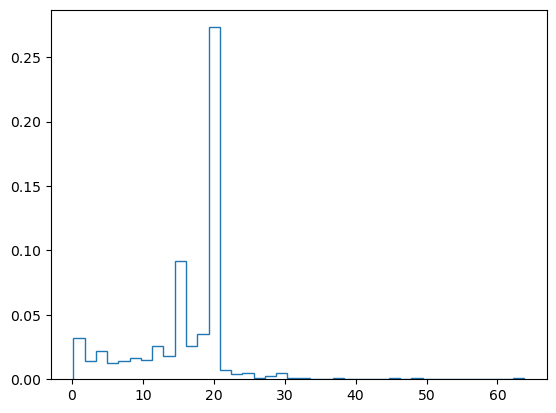

In [15]:
plt.hist((runsummary_pd['elapsed_time']/60), bins = 40, histtype='step', density = True)

In [4]:
long_runs = runsummary_pd['runnumber'][((runsummary_pd['elapsed_time']/60) > 18) & ((runsummary_pd['elapsed_time']/60) < 22)]

In [5]:
len(long_runs)

736

In [26]:
low_nsb_runs_2024 = cis_pd[['yyyymmdd','runnumber', 'subrun']][(cis_pd['diffuse_nsb_std'] < max_diffuse_nsb_std)]
low_nsb_runs_2024_full = cis_pd[(cis_pd['diffuse_nsb_std'] < max_diffuse_nsb_std)]
low_nsb_runsummary_2024  = runsummary_pd[runsummary_pd['runnumber'].isin(low_nsb_runs_2024['runnumber'])]
len(low_nsb_runsummary_2024)

1347

In [14]:
long_runs = low_nsb_runsummary_2024['runnumber'][((low_nsb_runsummary_2024['elapsed_time']/60) > 18) & ((low_nsb_runsummary_2024['elapsed_time']/60) < 22)]
long_runs_full = low_nsb_runsummary_2024[((low_nsb_runsummary_2024['elapsed_time']/60) > 18) & ((low_nsb_runsummary_2024['elapsed_time']/60) < 22)]

In [8]:
len(long_runs)/len(low_nsb_runsummary_2024)

0.48181143281366

In [11]:
test_pd = cis_pd[(cis_pd['diffuse_nsb_std'] < max_diffuse_nsb_std)]

(array([4.0000e+00, 1.0000e+00, 6.0000e+00, 8.8700e+02, 2.7716e+04,
        3.2553e+04, 3.4750e+04, 1.6235e+04, 6.1670e+03, 6.6540e+03]),
 array([0.81751817, 0.9657663 , 1.11401443, 1.26226256, 1.41051069,
        1.55875883, 1.70700696, 1.85525509, 2.00350322, 2.15175135,
        2.29999948]),
 <BarContainer object of 10 artists>)

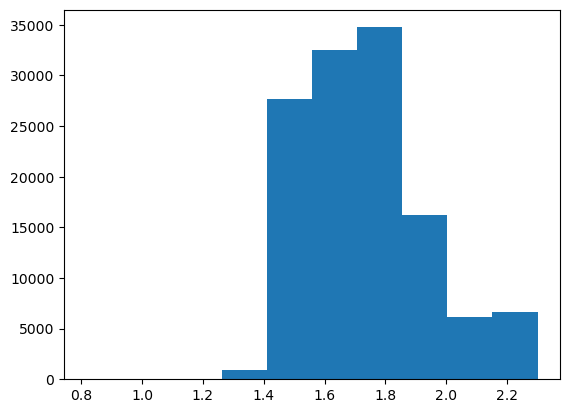

In [27]:
plt.hist(low_nsb_runs_2024_full['diffuse_nsb_std'])

In [35]:
# Save the Series to a CSV file
#long_runs.to_csv('/Users/vdk/Software/code/muon_paper_2024/series_data.csv')  # header=True to include the index name if it has one

In [46]:
# Read the CSV file back into a DataFrame
data_loaded = pd.read_csv('/Users/vdk/Software/code/muon_paper_2024/series_data.csv', index_col=0)

# Print the Series to verify
# print(data_loaded)

# Iterate through the Series and print each value
for index, value in data_loaded.items():
    print(f"{(value)}")

1       16274
7       16280
8       16281
15      16288
17      16290
        ...  
1536    18179
1538    18181
1539    18182
1540    18183
1541    18184
Name: runnumber, Length: 649, dtype: int64


In [60]:
test = np.array(data_loaded).flatten()

In [56]:
# flatten_test = test.flatten()

In [61]:
test[2]

16281

In [2]:
files = glob.glob('/Users/vdk/muons2024/v0.9-v0.10/20*/DL1_datacheck_*.h5')
files.sort()

runsummary = []
cosmics = []
cis = []
for file in files:
    try:
        runsummary.append(pd.read_hdf(file, 'runsummary'))
        cosmics.append(pd.read_hdf(file, 'cosmics'))
        cis.append(pd.read_hdf(file, 'cosmics_intensity_spectrum'))
    except:
        print(file)
    
cosmics_pd = pd.concat(cosmics, ignore_index=True)
runsummary_pd = pd.concat(runsummary, ignore_index=True)
cis_pd = pd.concat(cis, ignore_index=True)
cosmics_pd.columns

/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221217.h5
/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221218.h5
/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221219.h5


Index(['runnumber', 'subrun', 'time', 'elapsed_time', 'events', 'azimuth',
       'altitude', 'wrong_ucts_trig_type', 'wrong_tib_trig_type',
       'unknown_ucts_trig_type', 'unknown_tib_trig_type', 'num_ucts_jumps',
       'num_contained_mu_rings', 'mu_effi_mean', 'mu_effi_stddev',
       'mu_width_mean', 'mu_width_stddev', 'mu_radius_mean',
       'mu_radius_stddev', 'mu_intensity_mean', 'mu_hg_peak_sample',
       'mu_hg_peak_sample_stddev', 'fraction_pulses_above10',
       'fraction_pulses_above30'],
      dtype='object')

In [3]:
np.sum(list(cosmics_pd['elapsed_time']))

7778581.3168280125

In [4]:
cis_pd['diffuse_nsb_std'][(cis_pd['runnumber']==16893)]

788084    1.687177
788085    1.691283
788086    1.688206
788087    1.691254
788088    1.691004
            ...   
788193    1.704110
788194    1.711153
788195    1.692589
788196    1.817933
788197    2.025272
Name: diffuse_nsb_std, Length: 114, dtype: float64

In [5]:
runsummary_pd

,runnumber,time,elapsed_time,min_altitude,mean_altitude,max_altitude,min_azimuth,max_azimuth,mean_azimuth,mean_ra,...,cosmics_fraction_pulses_above10,cosmics_fraction_pulses_above30,mu_effi_mean,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_hg_peak_sample_mean,mu_hg_peak_sample_stddev,mu_intensity_mean,mean_number_of_pixels_nearby_stars
0,1615,1.574553e+09,1479.185384,0.975700,1.023473,1.071770,4.604371,4.669613,4.638297,8.676201,...,0.010371,0.002657,0.185405,0.016658,0.063517,0.019627,13.537994,1.856225,2345.397705,94.590164
1,1616,1.574555e+09,1492.465697,0.987698,1.034586,1.080668,1.632844,1.697178,1.663873,83.659785,...,0.011492,0.002690,0.189069,0.017308,0.066958,0.020823,13.449154,2.103875,2344.367188,172.612903
2,1617,1.574557e+09,877.161720,0.765613,0.793927,0.821958,4.754549,4.782424,4.768514,8.675483,...,0.063738,0.014507,0.185097,0.016637,0.063746,0.019914,13.583108,2.145763,2348.147705,94.257143
3,1618,1.574559e+09,1822.499924,1.203465,1.256385,1.309249,1.810407,1.983571,1.890577,83.668157,...,0.011613,0.002771,0.190177,0.016121,0.068275,0.019513,13.048642,1.708033,2344.768066,185.975309
4,1619,1.574560e+09,922.360651,0.538034,0.565980,0.594926,4.861833,4.887613,4.874952,8.704526,...,0.075007,0.041919,0.186359,0.016834,0.064143,0.018548,13.380842,2.011721,2380.755859,93.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7946,16893,1.709158e+09,888.711240,1.359878,1.368962,1.375415,2.717532,3.013267,2.861333,114.950790,...,0.004441,0.000700,0.162921,0.017423,0.072139,0.024615,13.042561,1.536448,1992.488892,68.078947
7947,16894,1.709159e+09,164.343513,1.376498,1.376861,1.377070,3.091234,3.151616,3.123227,114.114194,...,0.004671,0.000773,0.162358,0.012980,0.071298,0.020624,13.304904,1.724260,2005.241943,70.105263
7948,16895,1.709164e+09,1189.534480,0.617381,0.649953,0.683811,1.206617,1.226851,1.216676,198.074740,...,0.044832,0.002684,0.153658,0.018436,0.130765,0.025792,11.787273,1.294595,1349.975220,13.571429
7949,16896,1.709165e+09,1181.681148,0.704191,0.737945,0.770792,1.232727,1.250689,1.241980,197.130777,...,0.034031,0.002960,0.138740,0.012120,0.127006,0.020600,11.700397,1.563602,1320.588379,3.500000


In [6]:
high_nsb_runs

NameError: name 'high_nsb_runs' is not defined

#### Choose only runsummary for low_nsb runs

In [5]:
low_nsb_runs = cis_pd[['yyyymmdd','runnumber', 'subrun']][(cis_pd['diffuse_nsb_std'] < max_diffuse_nsb_std)]
low_nsb_runsummary = runsummary_pd[runsummary_pd['runnumber'].isin(low_nsb_runs['runnumber'])]
low_nsb_cosmics = cosmics_pd[cosmics_pd['runnumber'].isin(low_nsb_runs['runnumber'])]
low_nsb_cosmics

,runnumber,subrun,time,elapsed_time,events,azimuth,altitude,wrong_ucts_trig_type,wrong_tib_trig_type,unknown_ucts_trig_type,...,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_radius_mean,mu_radius_stddev,mu_intensity_mean,mu_hg_peak_sample,mu_hg_peak_sample_stddev,fraction_pulses_above10,fraction_pulses_above30
0,16273,0,1.704832e+09,6.790493,58559,3.155814,1.424738,0.0,0.0,0,...,0.014390,0.076186,0.021442,1.055724,0.077248,2015.086548,11.041667,3.735600,0.004683,0.000642
1,16273,1,1.704832e+09,6.878649,58509,3.159036,1.424701,0.0,0.0,0,...,0.012143,0.077893,0.018611,1.020130,0.110503,1874.674561,11.263158,4.664787,0.004802,0.000664
2,16273,2,1.704832e+09,7.278938,58466,3.162362,1.424715,0.0,0.0,0,...,0.011294,0.067694,0.015377,1.095736,0.078836,2078.286133,9.736842,1.147079,0.004866,0.000709
3,16273,3,1.704832e+09,7.495558,58410,3.165844,1.424745,0.0,0.0,0,...,0.012482,0.076996,0.018936,1.066369,0.095958,1945.951172,9.875000,1.226962,0.004789,0.000672
4,16273,4,1.704832e+09,7.484118,58416,3.169367,1.424800,0.0,0.0,0,...,0.012146,0.072865,0.019173,1.040498,0.102585,1945.879517,10.000000,1.064581,0.004808,0.000630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137272,18185,84,1.720587e+09,9.160903,58308,-1.007142,1.037601,0.0,0.0,0,...,0.011960,0.074613,0.018613,1.094378,0.085571,2018.018555,14.291667,1.852828,0.005380,0.000760
137273,18185,85,1.720587e+09,9.065719,58311,-1.007408,1.036974,0.0,0.0,0,...,0.011422,0.066903,0.021050,1.086197,0.091807,2081.345459,13.655172,1.078221,0.005371,0.000741
137274,18185,86,1.720587e+09,9.153535,58300,-1.007611,1.036496,0.0,0.0,0,...,0.016057,0.073450,0.022875,1.011372,0.115794,1912.573853,13.931034,1.222732,0.005381,0.000745
137275,18185,87,1.720587e+09,9.195149,58282,-1.007816,1.036000,0.0,0.0,0,...,0.014793,0.069433,0.016119,1.057097,0.122532,1979.170654,14.285714,1.383960,0.005366,0.000760


In [47]:
set_low_nsb = pd.DataFrame(set(low_nsb_cosmics['runnumber'][(low_nsb_cosmics['time'] > 1709158619.7528722)]), columns=['runnumber'])

In [48]:
# Low nsb runs for 2024 year, after February
set_low_nsb.to_csv('/Users/vdk/Software/code/muon_paper_2024/low_nsb_2024year.csv')

In [49]:
set_low_nsb

,runnumber
0,16897
1,16902
2,16903
3,16904
4,16905
...,...
884,18181
885,18182
886,18183
887,18184


In [ ]:
high_nsb_runs = cis_pd[['yyyymmdd','runnumber', 'subrun']][(cis_pd['diffuse_nsb_std'] > max_diffuse_nsb_std)]
high_nsb_runsummary = runsummary_pd[runsummary_pd['runnumber'].isin(high_nsb_runs['runnumber'])]
high_nsb_cosmics = cosmics_pd[cosmics_pd['runnumber'].isin(high_nsb_runs['runnumber'])]
high_nsb_runs

,yyyymmdd,runnumber,subrun
482,20191124,1626,15
1385,20200115,1792,0
1411,20200115,1792,26
1412,20200115,1792,27
1413,20200115,1792,28
...,...,...,...
788244,20240228,16897,1
788245,20240228,16897,2
788246,20240228,16897,3
788247,20240228,16897,4


In [ ]:
high_nsb_high_murings_rungs = runsummary_pd['runnumber'][runsummary_pd['num_contained_mu_rings'] > 2000]
type(high_nsb_high_murings_rungs)

pandas.core.series.Series

In [ ]:
intersection = high_nsb_runs[high_nsb_runs['runnumber'].isin(high_nsb_high_murings_rungs)]
intersection

,yyyymmdd,runnumber,subrun
482,20191124,1626,15
1806,20200115,1799,0
1807,20200115,1799,1
1808,20200115,1799,2
1809,20200115,1799,3
...,...,...,...
786970,20240218,16867,15
786971,20240218,16867,16
786972,20240218,16867,17
786973,20240218,16867,18


In [ ]:
intersection[intersection['runnumber'] == 16867]

,yyyymmdd,runnumber,subrun
786955,20240218,16867,0
786956,20240218,16867,1
786957,20240218,16867,2
786958,20240218,16867,3
786959,20240218,16867,4
786960,20240218,16867,5
786961,20240218,16867,6
786962,20240218,16867,7
786963,20240218,16867,8
786964,20240218,16867,9


In [15]:
searched_row = cis_pd.loc[(cis_pd['runnumber'] == 16876) & (cis_pd['subrun'] == 54)]
searched_row['diffuse_nsb_std']

787652    3.973809
Name: diffuse_nsb_std, dtype: float64

In [12]:
cis_pd['runnumber'][cis_pd['runnumber'] == 16876]

787598    16876
787599    16876
787600    16876
787601    16876
787602    16876
          ...  
787696    16876
787697    16876
787698    16876
787699    16876
787700    16876
Name: runnumber, Length: 103, dtype: int64

In [52]:
#high_nsb_runs.to_csv('/Users/vdk/highNSBvalues.csv')

In [30]:
# Unix timestamp
timestamp = 1.605927e+09

# Convert to a datetime object
dt_object = datetime.fromtimestamp(timestamp)

# Print the datetime in a human-readable format
print(dt_object.strftime('%Y-%m-%d %H:%M:%S'))


2020-11-21 03:50:00


In [34]:
mueff2019 = low_nsb_runsummary['mu_effi_mean'][(low_nsb_runsummary['time'] > start_date_2019) &
                                           (low_nsb_runsummary['time'] < end_date_2019)]
mueff2020 = low_nsb_runsummary['mu_effi_mean'][(low_nsb_runsummary['time'] > start_date_2020) &
                                           (low_nsb_runsummary['time'] < end_date_2020)]
mueff2021 = low_nsb_runsummary['mu_effi_mean'][(low_nsb_runsummary['time'] > start_date_2021) &
                                           (low_nsb_runsummary['time'] < end_date_2021)]
mueff2022 = low_nsb_runsummary['mu_effi_mean'][(low_nsb_runsummary['time'] > start_date_2022) &
                                           (low_nsb_runsummary['time'] < end_date_2022)]
mueff2023 = low_nsb_runsummary['mu_effi_mean'][(low_nsb_runsummary['time'] > start_date_2023) &
                                           (low_nsb_runsummary['time'] < end_date_2023)]
mueff2024 = low_nsb_runsummary['mu_effi_mean'][(low_nsb_runsummary['time'] > start_date_2024) &
                                           (low_nsb_runsummary['time'] < end_date_2024)]

mustd2019 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2019) &
                                           (low_nsb_runsummary['time'] < end_date_2019)]
mustd2020 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2020) &
                                           (low_nsb_runsummary['time'] < end_date_2020)]
mustd2021 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2021) &
                                           (low_nsb_runsummary['time'] < end_date_2021)]
mustd2022 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2022) &
                                           (low_nsb_runsummary['time'] < end_date_2022)]
mustd2023 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2023) &
                                           (low_nsb_runsummary['time'] < end_date_2023)]
mustd2024 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2024) &
                                           (low_nsb_runsummary['time'] < end_date_2024)]

musize2019 = low_nsb_runsummary['mu_intensity_mean'][(low_nsb_runsummary['time'] > start_date_2019) &
                                           (low_nsb_runsummary['time'] < end_date_2019)]
musize2020 = low_nsb_runsummary['mu_intensity_mean'][(low_nsb_runsummary['time'] > start_date_2020) &
                                           (low_nsb_runsummary['time'] < end_date_2020)]
musize2021 = low_nsb_runsummary['mu_intensity_mean'][(low_nsb_runsummary['time'] > start_date_2021) &
                                           (low_nsb_runsummary['time'] < end_date_2021)]
musize2022 = low_nsb_runsummary['mu_intensity_mean'][(low_nsb_runsummary['time'] > start_date_2022) &
                                           (low_nsb_runsummary['time'] < end_date_2022)]
musize2023 = low_nsb_runsummary['mu_intensity_mean'][(low_nsb_runsummary['time'] > start_date_2023) &
                                           (low_nsb_runsummary['time'] < end_date_2023)]
musize2024 = low_nsb_runsummary['mu_intensity_mean'][(low_nsb_runsummary['time'] > start_date_2024) &
                                           (low_nsb_runsummary['time'] < end_date_2024)]

print(f"Mean opt eff for 2019 year = {np.mean(mueff2019)} with std = {np.mean(mustd2019)}")
print(f"Mean opt eff for 2020 year = {np.mean(mueff2020)} with std = {np.mean(mustd2020)}")
print(f"Mean opt eff for 2021 year = {np.mean(mueff2021)} with std = {np.mean(mustd2021)}")
print(f"Mean opt eff for 2022 year = {np.mean(mueff2022)} with std = {np.mean(mustd2022)}")
print(f"Mean opt eff for 2023 year = {np.mean(mueff2023)} with std = {np.mean(mustd2023)}")
print(f"Mean opt eff for 2024 year = {np.mean(mueff2024)} with std = {np.mean(mustd2024)}")

print(f"Mean ring size for 2019 year = {np.mean(musize2019)}")
print(f"Mean ring size for 2020 year = {np.mean(musize2020)}")
print(f"Mean ring size for 2021 year = {np.mean(musize2021)}")
print(f"Mean ring size for 2022 year = {np.mean(musize2022)}")
print(f"Mean ring size for 2023 year = {np.mean(musize2023)}")
print(f"Mean ring size for 2024 year = {np.mean(musize2024)}")

Mean opt eff for 2019 year = 0.18772264820877527 with std = 0.016525570964113806
Mean opt eff for 2020 year = 0.16996789929541678 with std = 0.015218226819617008
Mean opt eff for 2021 year = 0.16489667338269035 with std = 0.014562399388914
Mean opt eff for 2022 year = 0.16632643653864448 with std = 0.014406424161550885
Mean opt eff for 2023 year = 0.1610312956430868 with std = 0.014305436857684638
Mean opt eff for 2024 year = 0.1656289079478359 with std = 0.014860721402655515
Mean ring size for 2019 year = 2326.3681278935187
Mean ring size for 2020 year = 2080.421520199983
Mean ring size for 2021 year = 2064.3254789521425
Mean ring size for 2022 year = 2050.867544451024
Mean ring size for 2023 year = 1993.6855959382106
Mean ring size for 2024 year = 2008.5434527760758


In [37]:
mueff2019 = high_nsb_runsummary['mu_effi_mean'][(high_nsb_runsummary['time'] > start_date_2019) &
                                           (high_nsb_runsummary['time'] < end_date_2019)]
mueff2020 = high_nsb_runsummary['mu_effi_mean'][(high_nsb_runsummary['time'] > start_date_2020) &
                                           (high_nsb_runsummary['time'] < end_date_2020)]
mueff2021 = high_nsb_runsummary['mu_effi_mean'][(high_nsb_runsummary['time'] > start_date_2021) &
                                           (high_nsb_runsummary['time'] < end_date_2021)]
mueff2022 = high_nsb_runsummary['mu_effi_mean'][(high_nsb_runsummary['time'] > start_date_2022) &
                                           (high_nsb_runsummary['time'] < end_date_2022)]
mueff2023 = high_nsb_runsummary['mu_effi_mean'][(high_nsb_runsummary['time'] > start_date_2023) &
                                           (high_nsb_runsummary['time'] < end_date_2023)]
mueff2024 = high_nsb_runsummary['mu_effi_mean'][(high_nsb_runsummary['time'] > start_date_2024) &
                                           (high_nsb_runsummary['time'] < end_date_2024)]

mustd2019 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2019) &
                                           (low_nsb_runsummary['time'] < end_date_2019)]
mustd2020 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2020) &
                                           (low_nsb_runsummary['time'] < end_date_2020)]
mustd2021 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2021) &
                                           (low_nsb_runsummary['time'] < end_date_2021)]
mustd2022 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2022) &
                                           (low_nsb_runsummary['time'] < end_date_2022)]
mustd2023 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2023) &
                                           (low_nsb_runsummary['time'] < end_date_2023)]
mustd2024 = low_nsb_runsummary['mu_effi_stddev'][(low_nsb_runsummary['time'] > start_date_2024) &
                                           (low_nsb_runsummary['time'] < end_date_2024)]

musize2019 = high_nsb_runsummary['mu_intensity_mean'][(high_nsb_runsummary['time'] > start_date_2019) &
                                           (high_nsb_runsummary['time'] < end_date_2019)]
musize2020 = high_nsb_runsummary['mu_intensity_mean'][(high_nsb_runsummary['time'] > start_date_2020) &
                                           (high_nsb_runsummary['time'] < end_date_2020)]
musize2021 = high_nsb_runsummary['mu_intensity_mean'][(high_nsb_runsummary['time'] > start_date_2021) &
                                           (high_nsb_runsummary['time'] < end_date_2021)]
musize2022 = high_nsb_runsummary['mu_intensity_mean'][(high_nsb_runsummary['time'] > start_date_2022) &
                                           (high_nsb_runsummary['time'] < end_date_2022)]
musize2023 = high_nsb_runsummary['mu_intensity_mean'][(high_nsb_runsummary['time'] > start_date_2023) &
                                           (high_nsb_runsummary['time'] < end_date_2023)]
musize2024 = high_nsb_runsummary['mu_intensity_mean'][(high_nsb_runsummary['time'] > start_date_2024) &
                                           (high_nsb_runsummary['time'] < end_date_2024)]

print(f"Mean opt eff for 2019 year = {np.mean(mueff2019)} with std = {np.mean(mustd2019)}")
print(f"Mean opt eff for 2020 year = {np.mean(mueff2020)} with std = {np.mean(mustd2020)}")
print(f"Mean opt eff for 2021 year = {np.mean(mueff2021)} with std = {np.mean(mustd2021)}")
print(f"Mean opt eff for 2022 year = {np.mean(mueff2022)} with std = {np.mean(mustd2022)}")
print(f"Mean opt eff for 2023 year = {np.mean(mueff2023)} with std = {np.mean(mustd2023)}")
print(f"Mean opt eff for 2024 year = {np.mean(mueff2024)} with std = {np.mean(mustd2024)}")

print(f"Mean ring size for 2019 year = {np.mean(musize2019)}")
print(f"Mean ring size for 2020 year = {np.mean(musize2020)}")
print(f"Mean ring size for 2021 year = {np.mean(musize2021)}")
print(f"Mean ring size for 2022 year = {np.mean(musize2022)}")
print(f"Mean ring size for 2023 year = {np.mean(musize2023)}")
print(f"Mean ring size for 2024 year = {np.mean(musize2024)}")

Mean opt eff for 2019 year = 0.18596724280677582 with std = 0.016525570964113806
Mean opt eff for 2020 year = 0.19567141105980043 with std = 0.015218226819617008
Mean opt eff for 2021 year = 0.18447257106736922 with std = 0.014562399388914
Mean opt eff for 2022 year = 0.18461418657038703 with std = 0.014406424161550885
Mean opt eff for 2023 year = 0.17160454924048268 with std = 0.014305436857684638
Mean opt eff for 2024 year = 0.17141525741550437 with std = 0.014860721402655515
Mean ring size for 2019 year = 2315.215087890625
Mean ring size for 2020 year = 1851.6632128263775
Mean ring size for 2021 year = 1818.1924509621836
Mean ring size for 2022 year = 1780.9419739239033
Mean ring size for 2023 year = 1840.122464139893
Mean ring size for 2024 year = 1766.1453829359734


In [38]:
runs2019 = low_nsb_runsummary['runnumber'][(low_nsb_runsummary['time'] > start_date_2019) &
                                           (low_nsb_runsummary['time'] < end_date_2019)]
runs2020 = low_nsb_runsummary['runnumber'][(low_nsb_runsummary['time'] > start_date_2020) &
                                           (low_nsb_runsummary['time'] < end_date_2020)]
runs2021 = low_nsb_runsummary['runnumber'][(low_nsb_runsummary['time'] > start_date_2021) &
                                           (low_nsb_runsummary['time'] < end_date_2021)]
runs2022 = low_nsb_runsummary['runnumber'][(low_nsb_runsummary['time'] > start_date_2022) &
                                           (low_nsb_runsummary['time'] < end_date_2022)]
runs2023 = low_nsb_runsummary['runnumber'][(low_nsb_runsummary['time'] > start_date_2023) &
                                           (low_nsb_runsummary['time'] < end_date_2023)]
runs2024 = low_nsb_runsummary['runnumber'][(low_nsb_runsummary['time'] > start_date_2024) &
                                           (low_nsb_runsummary['time'] < end_date_2024)]

mueff2024

7455    0.164158
7460    0.164210
7461    0.165379
7472    0.157132
7476    0.163279
          ...   
7933    0.168363
7940    0.161381
7948    0.153658
7949    0.138740
7950    0.136582
Name: mu_effi_mean, Length: 87, dtype: float64

In [36]:
np.mean(low_nsb_runsummary['mu_effi_mean'][-500:-1])

0.16559265655142136

In [14]:
np.mean(low_nsb_runsummary['mu_effi_mean'][:1000])

0.16922762684775053

In [1]:
#

NameError: name 'plt' is not defined

Text(0, 0.5, 'Size of the muon ring [p.e.]')

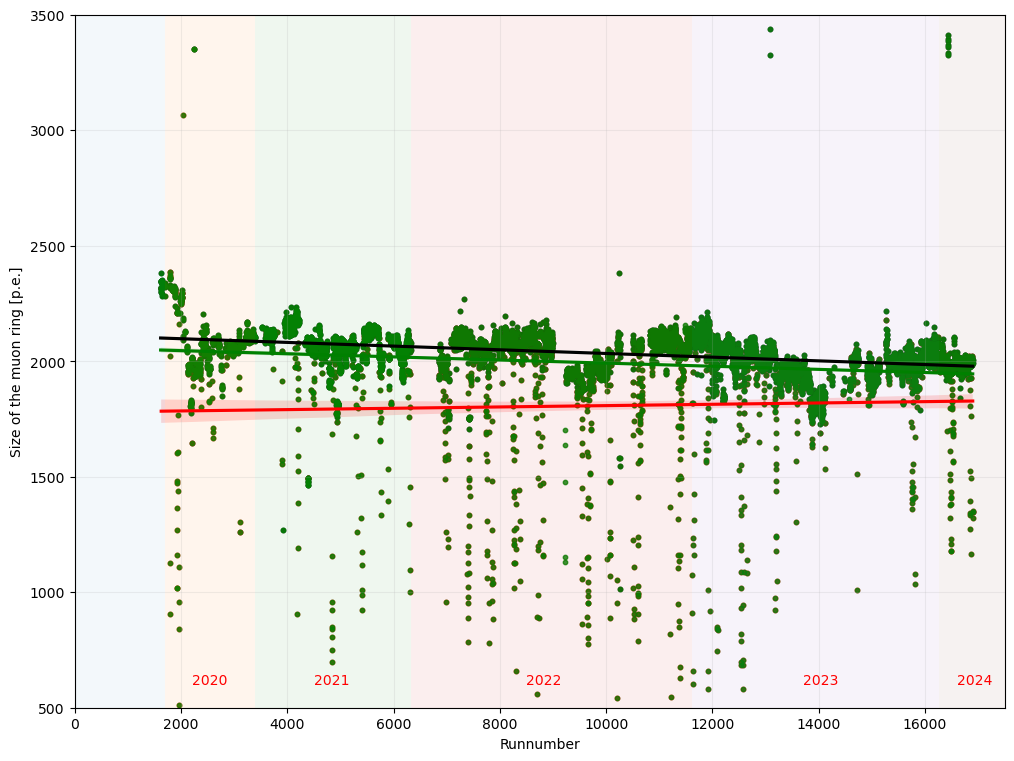

In [45]:
ytext = 600
plt.figure(figsize = (12,9))
sns.regplot(x=low_nsb_runsummary['runnumber'], y=low_nsb_runsummary['mu_intensity_mean'], color='k', scatter_kws={'s': 10})#, x_bins = 400)
sns.regplot(x=high_nsb_runsummary['runnumber'], y=high_nsb_runsummary['mu_intensity_mean'], color='r', scatter_kws={'s': 10})#, x_bins = 400)
sns.regplot(x=runsummary_pd['runnumber'], y=runsummary_pd['mu_intensity_mean'], color='g', scatter_kws={'s': 10})#, x_bins = 400)
plt.fill_betweenx(y=[0,4000], x1 = 0, x2=max(runs2019), alpha = 0.05)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2019), x2=max(runs2020), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2020), x2=max(runs2021), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2021), x2=max(runs2022), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2022), x2=max(runs2023), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2023), x2=20000, alpha = 0.075)
plt.annotate("2019",(600,250), c='red')
plt.annotate("2020",(2200,ytext), c='red')
plt.annotate("2021",(4500,ytext), c='red')
plt.annotate("2022",(8500,ytext), c='red')
plt.annotate("2023",(13700, ytext), c='red')
plt.annotate("2024",(16600,ytext), c='red')
plt.ylim(500,3500)
plt.xlim(0,17500)
plt.grid(alpha = 0.2)
plt.xlabel('Runnumber')
plt.ylabel('Size of the muon ring [p.e.]')
#plt.savefig('/Users/vdk/muons2024/images/prague_talk/mu_size.png', dpi=200, format='png', bbox_inches='tight')

Text(0, 0.5, 'Width of the ring [deg]')

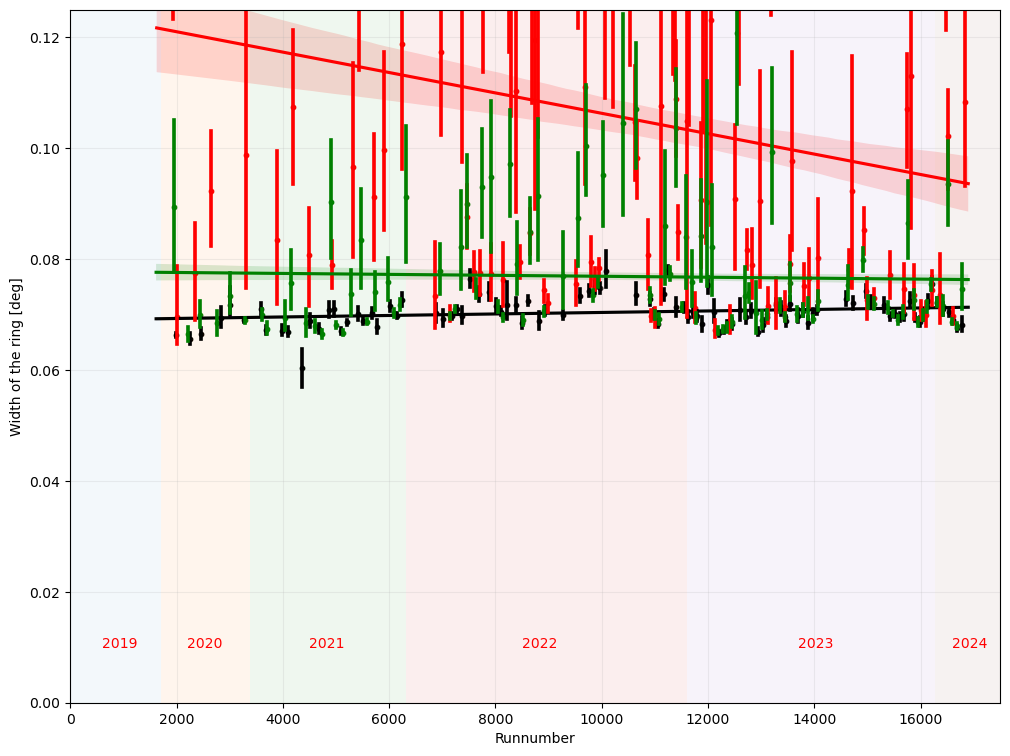

In [49]:
ytext = 0.01
plt.figure(figsize = (12,9))
sns.regplot(x=low_nsb_runsummary['runnumber'], y=low_nsb_runsummary['mu_width_mean'], color='k', scatter_kws={'s': 10}, x_bins = 100)
sns.regplot(x=high_nsb_runsummary['runnumber'], y=high_nsb_runsummary['mu_width_mean'], color='r', scatter_kws={'s': 10}, x_bins = 100)
sns.regplot(x=runsummary_pd['runnumber'], y=runsummary_pd['mu_width_mean'], color='g', scatter_kws={'s': 10}, x_bins = 100)
plt.fill_betweenx(y=[0,4000], x1 = 0, x2=max(runs2019), alpha = 0.05)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2019), x2=max(runs2020), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2020), x2=max(runs2021), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2021), x2=max(runs2022), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2022), x2=max(runs2023), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2023), x2=20000, alpha = 0.075)
plt.annotate("2019",(600, ytext), c='red')
plt.annotate("2020",(2200,ytext), c='red')
plt.annotate("2021",(4500,ytext), c='red')
plt.annotate("2022",(8500,ytext), c='red')
plt.annotate("2023",(13700, ytext), c='red')
plt.annotate("2024",(16600,ytext), c='red')
plt.ylim(0,0.125)
plt.xlim(0,17500)
plt.grid(alpha = 0.2)
plt.xlabel('Runnumber')
plt.ylabel('Width of the ring [deg]')
#plt.savefig('/Users/vdk/muons2024/images/prague_talk/mu_width.png', dpi=200, format='png', bbox_inches='tight')

In [6]:
muwidth2020 = low_nsb_runsummary['mu_width_mean'][(low_nsb_runsummary['time'] > start_date_2020) &
                                           (low_nsb_runsummary['time'] < end_date_2020)]
muwidth2023 = low_nsb_runsummary['mu_width_mean'][(low_nsb_runsummary['time'] > start_date_2023) &
                                           (low_nsb_runsummary['time'] < end_date_2023)]
muwidth2024 = low_nsb_runsummary['mu_width_mean'][(low_nsb_runsummary['time'] > start_date_2024) &
                                           (low_nsb_runsummary['time'] < end_date_2024)]

print(f"Mean ring width for 2020 year = {np.mean(muwidth2020)}")
print(f"Mean ring width for 2023 year = {np.mean(muwidth2023)}")
print(f"Mean ring width for 2024 year = {np.mean(muwidth2024)}")

Mean ring width for 2020 year = 0.06812494859062546
Mean ring width for 2023 year = 0.07033345270082957
Mean ring width for 2024 year = 0.06959774678617309


In [7]:
0.06812494859062546/0.07033345270082957

0.9685995209193241

In [8]:
ytext = 0.92
plt.figure(figsize = (12,9))
sns.regplot(x=low_nsb_cosmics['runnumber'], y=low_nsb_cosmics['mu_radius_mean'], color='k', scatter_kws={'s': 10}, x_bins = 600)#x_bins = int(len(low_nsb_cosmics['runnumber'])**0.5))
plt.fill_betweenx(y=[0,4000], x1 = 0, x2=max(runs2019), alpha = 0.05)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2019), x2=max(runs2020), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2020), x2=max(runs2021), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2021), x2=max(runs2022), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2022), x2=max(runs2023), alpha = 0.075)
plt.fill_betweenx(y=[0,4000], x1 = max(runs2023), x2=20000, alpha = 0.075)
plt.annotate("2019",(600, ytext), c='red')
plt.annotate("2020",(2200,ytext), c='red')
plt.annotate("2021",(4500,ytext), c='red')
plt.annotate("2022",(8500,ytext), c='red')
plt.annotate("2023",(13700, ytext), c='red')
plt.annotate("2024",(16600,ytext), c='red')
plt.ylim(0.9,1.3)
plt.xlim(0,17500)
plt.grid(alpha = 0.2)
plt.xlabel('Runnumber')
plt.ylabel('Radius of the ring [deg]')
#plt.savefig('/Users/vdk/muons2024/images/prague_talk/mu_radius.png', dpi=200, format='png', bbox_inches='tight')

In [102]:
low_nsb_cosmics

,runnumber,subrun,time,elapsed_time,events,azimuth,altitude,wrong_ucts_trig_type,wrong_tib_trig_type,unknown_ucts_trig_type,...,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_radius_mean,mu_radius_stddev,mu_intensity_mean,mu_hg_peak_sample,mu_hg_peak_sample_stddev,fraction_pulses_above10,fraction_pulses_above30
0,1615,0,1.574552e+09,24.100643,50637,4.604371,1.071770,0.0,10.0,50637,...,0.010725,0.062351,0.017688,1.070335,0.099711,2313.711426,12.662162,1.037344,0.010618,0.002622
1,1615,1,1.574552e+09,24.087356,50634,4.607692,1.067383,0.0,8.0,50634,...,0.013619,0.066789,0.017587,1.046328,0.108055,2315.158691,13.393939,1.507711,0.010700,0.002738
2,1615,2,1.574552e+09,24.476276,50605,4.608190,1.066719,0.0,10.0,50605,...,0.015461,0.064313,0.020475,1.083877,0.105996,2343.243164,12.847222,1.285452,0.010981,0.002713
3,1615,3,1.574553e+09,24.035344,50645,4.609890,1.064421,0.0,10.0,50645,...,0.013594,0.064370,0.026010,1.050182,0.115174,2297.864502,13.094595,1.346420,0.010611,0.002712
4,1615,4,1.574553e+09,25.515290,50630,4.610365,1.063804,0.0,9.0,50630,...,0.013783,0.062570,0.015944,1.088282,0.101900,2372.299072,12.847222,1.589222,0.010605,0.002699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790755,16897,4,1.709166e+09,119.236720,36080,1.248052,0.800884,0.0,0.0,0,...,0.009036,0.126604,0.015442,1.146832,0.102177,1323.607422,11.375000,1.500000,0.030590,0.004015
790756,16897,5,1.709166e+09,150.845175,29721,1.249751,0.808214,0.0,0.0,0,...,0.011334,0.122119,0.021165,1.087885,0.053706,1298.256470,10.666667,1.775251,0.037174,0.004128
790757,16897,6,1.709167e+09,176.522166,24594,1.252201,0.818946,0.0,0.0,0,...,NaN,0.111994,NaN,1.200372,NaN,1388.520020,4.000000,NaN,0.042609,0.005328
790758,16897,7,1.709167e+09,177.568846,24384,1.254610,0.829748,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025073,0.005885


In [98]:
low_nsb_cosmics

,runnumber,subrun,time,elapsed_time,events,azimuth,altitude,wrong_ucts_trig_type,wrong_tib_trig_type,unknown_ucts_trig_type,...,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_radius_mean,mu_radius_stddev,mu_intensity_mean,mu_hg_peak_sample,mu_hg_peak_sample_stddev,fraction_pulses_above10,fraction_pulses_above30
0,1615,0,1.574552e+09,24.100643,50637,4.604371,1.071770,0.0,10.0,50637,...,0.010725,0.062351,0.017688,1.070335,0.099711,2313.711426,12.662162,1.037344,0.010618,0.002622
1,1615,1,1.574552e+09,24.087356,50634,4.607692,1.067383,0.0,8.0,50634,...,0.013619,0.066789,0.017587,1.046328,0.108055,2315.158691,13.393939,1.507711,0.010700,0.002738
2,1615,2,1.574552e+09,24.476276,50605,4.608190,1.066719,0.0,10.0,50605,...,0.015461,0.064313,0.020475,1.083877,0.105996,2343.243164,12.847222,1.285452,0.010981,0.002713
3,1615,3,1.574553e+09,24.035344,50645,4.609890,1.064421,0.0,10.0,50645,...,0.013594,0.064370,0.026010,1.050182,0.115174,2297.864502,13.094595,1.346420,0.010611,0.002712
4,1615,4,1.574553e+09,25.515290,50630,4.610365,1.063804,0.0,9.0,50630,...,0.013783,0.062570,0.015944,1.088282,0.101900,2372.299072,12.847222,1.589222,0.010605,0.002699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790755,16897,4,1.709166e+09,119.236720,36080,1.248052,0.800884,0.0,0.0,0,...,0.009036,0.126604,0.015442,1.146832,0.102177,1323.607422,11.375000,1.500000,0.030590,0.004015
790756,16897,5,1.709166e+09,150.845175,29721,1.249751,0.808214,0.0,0.0,0,...,0.011334,0.122119,0.021165,1.087885,0.053706,1298.256470,10.666667,1.775251,0.037174,0.004128
790757,16897,6,1.709167e+09,176.522166,24594,1.252201,0.818946,0.0,0.0,0,...,NaN,0.111994,NaN,1.200372,NaN,1388.520020,4.000000,NaN,0.042609,0.005328
790758,16897,7,1.709167e+09,177.568846,24384,1.254610,0.829748,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025073,0.005885


In [7]:
test_file = '/Users/vdk/dl1_run201_muon_lst.h5'
with h5py.File(test_file, 'r') as file:
    # List all groups and datasets in the file
    print("Contents of the HDF5 file:")
    for name in file:
        print(name)

Contents of the HDF5 file:
configuration
dl1
simulation


In [5]:

with pd.HDFStore(test_file) as hdf:
    print(hdf.keys())

[]


In [2]:
files = glob.glob('/Users/vdk/muons2024/v0.9-v0.10/20*/DL1_datacheck_*.h5')
files.sort()

# This takes a few minutes... DON'T RUN IT MORE THAN ONCE, it is not needed! (If you change the 
# sky region or the cuts just execute the cells from "Data selection configuration" onwards)
dummy = []
dummy2 = []
dummy3 = []

missing_flatfield_tables = 0
for i, file in enumerate(files):
    if i%10 == 0:
        print(i, '/', len(files), file)
    try:
        dummy.append(pd.read_hdf(file, 'cosmics_intensity_spectrum'))
        dummy2.append(pd.read_hdf(file, 'runsummary'))
        fftable = pd.read_hdf(file, 'flatfield', errors='ignore')
        dummy3.append(fftable)
    except: 
            # some check files have no flatfield table at all (if calibox was off) 
        missing_flatfield_tables += 1

# cosmics intensity spectra table (subrun-wise):
cis = pd.concat(dummy, ignore_index=True)

# flatfield table (subrun-wise):
flatfield = pd.concat(dummy3, ignore_index=True)

# parameters computed run-wise:
runsummary = pd.concat(dummy2, ignore_index=True)

0 / 541 /Users/vdk/muons2024/v0.9-v0.10/20191123/DL1_datacheck_20191123.h5
10 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200131/DL1_datacheck_20200131.h5
20 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200618/DL1_datacheck_20200618.h5
30 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200722/DL1_datacheck_20200722.h5
40 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200817/DL1_datacheck_20200817.h5
50 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200918/DL1_datacheck_20200918.h5
60 / 541 /Users/vdk/muons2024/v0.9-v0.10/20201123/DL1_datacheck_20201123.h5
70 / 541 /Users/vdk/muons2024/v0.9-v0.10/20201217/DL1_datacheck_20201217.h5
80 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210212/DL1_datacheck_20210212.h5
90 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210311/DL1_datacheck_20210311.h5
100 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210321/DL1_datacheck_20210321.h5
110 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210420/DL1_datacheck_20210420.h5
120 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210512/DL1_datacheck_20210512.h5
130 / 541 

In [3]:
cis.columns

Index(['yyyymmdd', 'ra_tel', 'dec_tel', 'cos_zenith', 'az_tel', 'runnumber',
       'subrun', 'time', 'elapsed_time', 'corrected_elapsed_time',
       'delta_t_exp_index', 'cosmics_rate', 'cosmics_cleaned_rate',
       'intensity_at_half_peak_rate', 'intensity_at_peak_rate',
       'ZD_corrected_intensity_at_half_peak_rate', 'cosmics_peak_rate',
       'ZD_corrected_cosmics_peak_rate', 'cosmics_rate_at_422_pe',
       'delta_cosmics_rate_at_422_pe', 'ZD_corrected_cosmics_rate_at_422_pe',
       'ZD_corrected_delta_cosmics_rate_at_422_pe', 'cosmics_spectral_index',
       'delta_cosmics_spectral_index', 'ZD_corrected_cosmics_spectral_index',
       'intensity_spectrum_fit_p_value', 'intensity_at_reference_rate',
       'light_yield', 'diffuse_nsb_std', 'num_star_affected_pixels',
       'anomalous_low_intensity_peak'],
      dtype='object')

In [4]:
runsummary.columns

Index(['runnumber', 'time', 'elapsed_time', 'min_altitude', 'mean_altitude',
       'max_altitude', 'min_azimuth', 'max_azimuth', 'mean_azimuth', 'mean_ra',
       'mean_dec', 'num_cosmics', 'num_pedestals', 'num_flatfield',
       'num_unknown_ucts_trigger_tags', 'num_wrong_ucts_tags_in_cosmics',
       'num_wrong_ucts_tags_in_pedestals', 'num_wrong_ucts_tags_in_flatfield',
       'num_ucts_jumps', 'num_unknown_tib_trigger_tags',
       'num_wrong_tib_tags_in_cosmics', 'num_wrong_tib_tags_in_pedestals',
       'num_wrong_tib_tags_in_flatfield', 'num_pedestals_after_cleaning',
       'num_contained_mu_rings', 'ff_charge_mean', 'ff_charge_mean_err',
       'ff_charge_stddev', 'ff_time_mean', 'ff_time_mean_err',
       'ff_time_stddev', 'ff_rel_time_stddev', 'ped_charge_mean',
       'ped_charge_mean_err', 'ped_charge_stddev',
       'ped_fraction_pulses_above10', 'ped_fraction_pulses_above30',
       'cosmics_fraction_pulses_above10', 'cosmics_fraction_pulses_above30',
       'mu_effi_m

In [10]:
runsummary['time'] + runsummary['elapsed_time']

0       1.574555e+09
1       1.574557e+09
2       1.574558e+09
3       1.574560e+09
4       1.574561e+09
            ...     
7927    1.709159e+09
7928    1.709159e+09
7929    1.709165e+09
7930    1.709166e+09
7931    1.709167e+09
Length: 7932, dtype: float64

In [6]:
muon_file = '/Users/vdk/muons2024/fits_complete_rings_low_nsb.csv'
complete_muons = pd.read_csv(muon_file, na_values=['NA', '?'])
complete_muons

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_43865/3867205049.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  complete_muons = pd.read_csv(muon_file, na_values=['NA', '?'])


,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,1941.0,1.574637e+09,-1.0,2893.3574,0.0000,-0.013183,-0.763841,1.214987,0.048164,1.0,...,5.277139,-0.986183,5.184172e+00,0.046470,0.299525,0.712288,514.0,0.212581,17.0,0.0
1,4492.0,1.574637e+09,-1.0,2824.7890,0.0000,-0.854613,0.716758,1.086725,0.065736,1.0,...,3.133410,1.883379,-2.504225e+00,0.053289,-0.119353,0.510168,386.0,0.437346,17.0,0.0
2,20971.0,1.574637e+09,-1.0,2678.1260,0.0000,-0.764456,-0.698571,1.168469,0.048773,1.0,...,2.546869,1.965883,-1.619212e+00,0.047076,0.008654,0.055737,441.0,-0.097600,12.0,0.0
3,21236.0,1.574637e+09,-1.0,2043.9331,35.9562,-0.053629,-0.577745,0.947473,0.105266,1.0,...,2.753395,-1.439179,2.347328e+00,0.095284,0.438177,-0.049244,310.0,0.521020,11.0,0.0
4,25898.0,1.574637e+09,-1.0,2725.8662,0.0000,-0.112270,-0.503060,1.087793,0.057854,1.0,...,5.108200,1.481647,4.888602e+00,0.051777,0.087641,0.411981,413.0,0.145437,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559998,4832271.0,1.674713e+09,-1.0,2451.2640,0.0000,0.064439,-0.431779,1.149180,0.050668,True,...,2.305934,1.634509,1.626564e+00,0.047984,0.176765,-0.377433,460.0,0.309496,11.0,0.0
559999,4860051.0,1.674713e+09,-1.0,2450.8203,0.0000,-0.743894,-0.118593,1.146008,0.109167,True,...,4.624393,3.152691,-3.383128e+00,0.093707,0.612962,-0.400181,455.0,0.156043,13.0,0.0
560000,4941715.0,1.674713e+09,-1.0,2117.2670,0.0000,0.176642,-1.167494,0.975700,0.070373,True,...,2.864238,-2.864238,-1.374788e-11,0.054849,0.171876,0.039867,326.0,0.334501,9.0,0.0
560001,4980140.0,1.674713e+09,-1.0,2393.4565,0.0000,-0.472382,0.798678,1.154532,0.038051,True,...,4.631013,-3.373000,-3.173193e+00,0.041282,0.147956,0.381999,456.0,0.092764,11.0,0.0


In [7]:
complete_muons['event_time']

0         1.574637e+09
1         1.574637e+09
2         1.574637e+09
3         1.574637e+09
4         1.574637e+09
              ...     
559998    1.674713e+09
559999    1.674713e+09
560000    1.674713e+09
560001    1.674713e+09
560002    1.674713e+09
Name: event_time, Length: 560003, dtype: float64

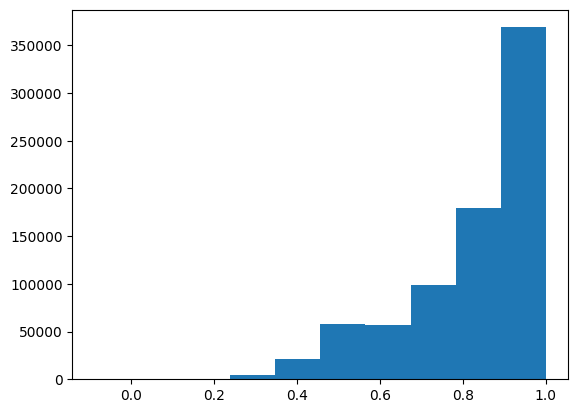

In [7]:
z,x,c = plt.hist(cis['cos_zenith'])

In [42]:
# Choose only runs with zenith anlge < 5 degrees and then create two tables with the time of start and time of end
runnumbers = cis['runnumber'][cis['cos_zenith'] >= np.cos(np.deg2rad(5))]
zenith_table = runsummary[runsummary['runnumber'].isin(runnumbers)]
start_table = zenith_table['time']
end_table = zenith_table['time']+zenith_table['elapsed_time']
# for index,row in new_table.iterrow:
#     print(row)
for start, end in zip(start_table, end_table):
    print(f"start = {start} / end = {end} and difference = {start - end}")

zenith_table.to_csv('/Users/vdk/muons2024/data_zenith_cuts/zenith<5deg.csv', index=False)

,runnumber,time,elapsed_time,min_altitude,mean_altitude,max_altitude,min_azimuth,max_azimuth,mean_azimuth,mean_ra,...,cosmics_fraction_pulses_above10,cosmics_fraction_pulses_above30,mu_effi_mean,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_hg_peak_sample_mean,mu_hg_peak_sample_stddev,mu_intensity_mean,mean_number_of_pixels_nearby_stars
484,3281,1.608087e+09,872.868684,1.449840,1.473165,1.493996,3.864836,4.237820,4.075891,102.690453,...,0.007677,0.001291,0.174192,0.014407,0.071913,0.019894,15.852277,1.241201,2103.485596,112.761194
527,3357,1.608516e+09,1190.723563,1.471359,1.492671,1.505779,2.266717,3.165967,2.640359,103.091013,...,0.007172,0.001317,0.173380,0.019247,0.069431,0.024737,17.234296,1.237973,2118.220215,120.050000
528,3358,1.608517e+09,1215.867091,1.454489,1.482294,1.502998,3.397074,4.141995,3.840676,103.140637,...,0.007422,0.001386,0.172812,0.019776,0.068993,0.023816,17.270291,1.395335,2111.790527,120.979381
726,4042,1.615773e+09,884.650035,1.483621,1.483621,1.483622,0.001555,0.013397,0.007541,183.688724,...,0.004388,0.000724,0.171983,0.014164,0.066339,0.019823,23.364555,1.312042,2150.824707,32.477778
727,4043,1.615774e+09,98.594211,1.483622,1.483623,1.483626,0.014507,1.572054,0.753417,189.427765,...,0.004293,0.000708,0.171676,0.014433,0.064081,0.018838,23.289017,1.250041,2174.391602,36.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,16784,1.707887e+09,1180.439943,1.475146,1.494122,1.504486,-0.772038,0.091983,5.884882,197.622569,...,0.004287,0.000773,0.155108,0.012856,0.067415,0.019308,14.503424,1.494346,1950.108032,10.269231
7883,16829,1.708058e+09,1191.488000,1.461875,1.488555,1.508432,0.258381,0.958893,0.676151,198.093636,...,0.004277,0.000763,0.159660,0.013681,0.068134,0.019892,14.408363,1.484651,2000.157471,10.489051
7884,16830,1.708059e+09,1184.180313,1.475859,1.498052,1.510696,-0.862725,0.020951,5.788487,197.149294,...,0.004287,0.000753,0.158924,0.013326,0.067824,0.019640,14.119243,1.474128,1995.159180,0.759398
7905,16857,1.708144e+09,1210.243678,1.489218,1.504907,1.510645,-0.334746,0.722135,0.236421,197.147718,...,0.004302,0.000762,0.158373,0.013485,0.066297,0.019614,15.232028,1.496467,1984.309326,0.985294


In [59]:
max(np.rad2deg(runsummary['mean_altitude']))

89.04855646394101

In [11]:
runsummary.columns

Index(['runnumber', 'time', 'elapsed_time', 'min_altitude', 'mean_altitude',
       'max_altitude', 'min_azimuth', 'max_azimuth', 'mean_azimuth', 'mean_ra',
       'mean_dec', 'num_cosmics', 'num_pedestals', 'num_flatfield',
       'num_unknown_ucts_trigger_tags', 'num_wrong_ucts_tags_in_cosmics',
       'num_wrong_ucts_tags_in_pedestals', 'num_wrong_ucts_tags_in_flatfield',
       'num_ucts_jumps', 'num_unknown_tib_trigger_tags',
       'num_wrong_tib_tags_in_cosmics', 'num_wrong_tib_tags_in_pedestals',
       'num_wrong_tib_tags_in_flatfield', 'num_pedestals_after_cleaning',
       'num_contained_mu_rings', 'ff_charge_mean', 'ff_charge_mean_err',
       'ff_charge_stddev', 'ff_time_mean', 'ff_time_mean_err',
       'ff_time_stddev', 'ff_rel_time_stddev', 'ped_charge_mean',
       'ped_charge_mean_err', 'ped_charge_stddev',
       'ped_fraction_pulses_above10', 'ped_fraction_pulses_above30',
       'cosmics_fraction_pulses_above10', 'cosmics_fraction_pulses_above30',
       'mu_effi_m

In [15]:
runsummary['runnumber'][(np.degrees(runsummary['mean_altitude']) > 88) & (np.degrees(runsummary['mean_altitude']) < 90)] #& (runsummary_pd['mu_radius_mean'] > 0.95) & (runsummary_pd['mu_radius_mean'] < 1.3)]

5225    12579
5402    12833
6130    13867
Name: runnumber, dtype: int64

In [21]:
# Lets choose only values with zenith anlge that differs not much than 1 degree
def delta(a,b):
    return abs(np.rad2deg(a)-np.rad2deg(b))

#runsummary_pd['runnumber'][(np.degrees(runsummary_pd['_altitude']) > 44) & (np.degrees(runsummary_pd['mean_altitude']) < 45)]) #& (runsummary_pd['mu_radius_mean'] > 0.95) & (runsummary_pd['mu_radius_mean'] < 1.3)]
zd_runnumbers = runsummary_pd['runnumber'][
    (delta(runsummary_pd['min_altitude'],runsummary_pd['max_altitude'])< 1) & 
    (delta(runsummary_pd['min_azimuth'],runsummary_pd['max_azimuth'])< 1) & 
    (runsummary_pd['mu_effi_stddev']<=0.02) & 
    (runsummary_pd['mu_width_stddev']<0.02) &
    (runsummary_pd['num_contained_mu_rings'])
]
zenith_table = runsummary_pd[runsummary_pd['runnumber'].isin(zd_runnumbers)]

,runnumber,time,elapsed_time,min_altitude,mean_altitude,max_altitude,min_azimuth,max_azimuth,mean_azimuth,mean_ra,...,cosmics_fraction_pulses_above10,cosmics_fraction_pulses_above30,mu_effi_mean,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_hg_peak_sample_mean,mu_hg_peak_sample_stddev,mu_intensity_mean,mean_number_of_pixels_nearby_stars
0,1615,1.574553e+09,1479.185384,0.975700,1.023473,1.071770,4.604371,4.669613,4.638297,8.676201,...,0.010371,0.002657,0.185405,0.016658,0.063517,0.019627,13.537994,1.856225,2345.397705,94.590164
1,1616,1.574555e+09,1492.465697,0.987698,1.034586,1.080668,1.632844,1.697178,1.663873,83.659785,...,0.011492,0.002690,0.189069,0.017308,0.066958,0.020823,13.449154,2.103875,2344.367188,172.612903
2,1617,1.574557e+09,877.161720,0.765613,0.793927,0.821958,4.754549,4.782424,4.768514,8.675483,...,0.063738,0.014507,0.185097,0.016637,0.063746,0.019914,13.583108,2.145763,2348.147705,94.257143
3,1618,1.574559e+09,1822.499924,1.203465,1.256385,1.309249,1.810407,1.983571,1.890577,83.668157,...,0.011613,0.002771,0.190177,0.016121,0.068275,0.019513,13.048642,1.708033,2344.768066,185.975309
4,1619,1.574560e+09,922.360651,0.538034,0.565980,0.594926,4.861833,4.887613,4.874952,8.704526,...,0.075007,0.041919,0.186359,0.016834,0.064143,0.018548,13.380842,2.011721,2380.755859,93.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,16893,1.709158e+09,888.711240,1.359878,1.368962,1.375415,2.717532,3.013267,2.861333,114.950790,...,0.004441,0.000700,0.162921,0.017423,0.072139,0.024615,13.042561,1.536448,1992.488892,68.078947
7928,16894,1.709159e+09,164.343513,1.376498,1.376861,1.377070,3.091234,3.151616,3.123227,114.114194,...,0.004671,0.000773,0.162358,0.012980,0.071298,0.020624,13.304904,1.724260,2005.241943,70.105263
7929,16895,1.709164e+09,1189.534480,0.617381,0.649953,0.683811,1.206617,1.226851,1.216676,198.074740,...,0.044832,0.002684,0.153658,0.018436,0.130765,0.025792,11.787273,1.294595,1349.975220,13.571429
7930,16896,1.709165e+09,1181.681148,0.704191,0.737945,0.770792,1.232727,1.250689,1.241980,197.130777,...,0.034031,0.002960,0.138740,0.012120,0.127006,0.020600,11.700397,1.563602,1320.588379,3.500000


In [106]:
new_table = cis[['yyyymmdd','runnumber', 'subrun']][(cis['diffuse_nsb_std'] < max_diffuse_nsb_std)]
new_table

,yyyymmdd,runnumber,subrun
0,20191123,1615,0
1,20191123,1615,1
2,20191123,1615,2
3,20191123,1615,3
4,20191123,1615,4
...,...,...,...
788215,20240228,16894,17
788216,20240228,16894,18
788249,20240228,16897,6
788250,20240228,16897,7


In [ ]:
new_table.to_csv('/Users/vdk/muons2024/1000-2000BigFitsLSTcuts.csv', index=False)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [43]:
runsummary_pd

,runnumber,time,elapsed_time,min_altitude,mean_altitude,max_altitude,min_azimuth,max_azimuth,mean_azimuth,mean_ra,...,cosmics_fraction_pulses_above10,cosmics_fraction_pulses_above30,mu_effi_mean,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_hg_peak_sample_mean,mu_hg_peak_sample_stddev,mu_intensity_mean,mean_number_of_pixels_nearby_stars
0,1615,1.574553e+09,1479.185384,0.975700,1.023473,1.071770,4.604371,4.669613,4.638297,8.676201,...,0.010371,0.002657,0.185405,0.016658,0.063517,0.019627,13.537994,1.856225,2345.397705,94.590164
1,1616,1.574555e+09,1492.465697,0.987698,1.034586,1.080668,1.632844,1.697178,1.663873,83.659785,...,0.011492,0.002690,0.189069,0.017308,0.066958,0.020823,13.449154,2.103875,2344.367188,172.612903
2,1617,1.574557e+09,877.161720,0.765613,0.793927,0.821958,4.754549,4.782424,4.768514,8.675483,...,0.063738,0.014507,0.185097,0.016637,0.063746,0.019914,13.583108,2.145763,2348.147705,94.257143
3,1618,1.574559e+09,1822.499924,1.203465,1.256385,1.309249,1.810407,1.983571,1.890577,83.668157,...,0.011613,0.002771,0.190177,0.016121,0.068275,0.019513,13.048642,1.708033,2344.768066,185.975309
4,1619,1.574560e+09,922.360651,0.538034,0.565980,0.594926,4.861833,4.887613,4.874952,8.704526,...,0.075007,0.041919,0.186359,0.016834,0.064143,0.018548,13.380842,2.011721,2380.755859,93.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7946,16893,1.709158e+09,888.711240,1.359878,1.368962,1.375415,2.717532,3.013267,2.861333,114.950790,...,0.004441,0.000700,0.162921,0.017423,0.072139,0.024615,13.042561,1.536448,1992.488892,68.078947
7947,16894,1.709159e+09,164.343513,1.376498,1.376861,1.377070,3.091234,3.151616,3.123227,114.114194,...,0.004671,0.000773,0.162358,0.012980,0.071298,0.020624,13.304904,1.724260,2005.241943,70.105263
7948,16895,1.709164e+09,1189.534480,0.617381,0.649953,0.683811,1.206617,1.226851,1.216676,198.074740,...,0.044832,0.002684,0.153658,0.018436,0.130765,0.025792,11.787273,1.294595,1349.975220,13.571429
7949,16896,1.709165e+09,1181.681148,0.704191,0.737945,0.770792,1.232727,1.250689,1.241980,197.130777,...,0.034031,0.002960,0.138740,0.012120,0.127006,0.020600,11.700397,1.563602,1320.588379,3.500000


In [95]:
mean_opt_efficiency = []
observation_date = []
mean_runs = []
std_opt = []
mean_width = []
mean_width_std = []
mean_size = []
mean_radius = []
radius = []
width = []


for observation in cosmics:
    print(observation)
    time = np.mean(observation['time']) 
    observation_date.append(datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))
    mean_opt_efficiency.append(np.mean(observation['mu_effi_mean']))
    mean_runs.append(int(np.mean(observation['runnumber'])))
    std_opt.append(np.mean(observation['mu_effi_stddev']))
    mean_width.append(np.mean(observation['mu_width_mean']))
    mean_width_std.append(np.mean(observation['mu_width_stddev']))
    mean_size.append(np.mean(observation['mu_intensity_mean']))
    mean_radius.append(np.mean(observation['mu_radius_mean']))
    for radi in observation['mu_radius_mean']:
        radius.append(radi)
    for wid in observation['mu_width_mean']:
        width.append(wid)


runnumber


TypeError: string indices must be integers

In [17]:
# Algoprithm to count number of runs in each year

time = []
runnumber = []

for observ in runsummary:
    for item in observ['time']:
        time.append(item)


time = [datetime.utcfromtimestamp(item).strftime('%Y-%m-%d %H:%M:%S') for item in time]
dates = []
for date in time:
    dates.append(int(date.split(' ')[0][:4]))

check_points = []
check = 0  
for year in set(dates):
    check_points.append(dates.count(year)+check)
    check = check + dates.count(year)

runs = []
runs_check = 0  
for i,observ in enumerate(runsummary):
    for run in observ['runnumber']:
        runs.append(run)
 
x_fill = [runsummary[0]['runnumber'][0]]
for i,run in enumerate(runs):
    if i in check_points:
        x_fill.append(run)
        
x_fill.append(runsummary[-1]['runnumber'][9])

print(f"number of runs in each year {x_fill}")
print(f"2019 year = {dates.count(2019)}")
print(f"2020 year = {dates.count(2020)}")
print(f"2021 year = {dates.count(2021)}")
print(f"2022 year = {dates.count(2022)}")
print(f"2023 year = {dates.count(2023)}")
print(f"2024 year = {dates.count(2024)}")

number of runs in each year [1615, 1787, 3514, 6851, 11457]
2019 year = 27
2020 year = 515
2021 year = 1345
2022 year = 2476
2023 year = 0
2024 year = 0


IndexError: list index out of range

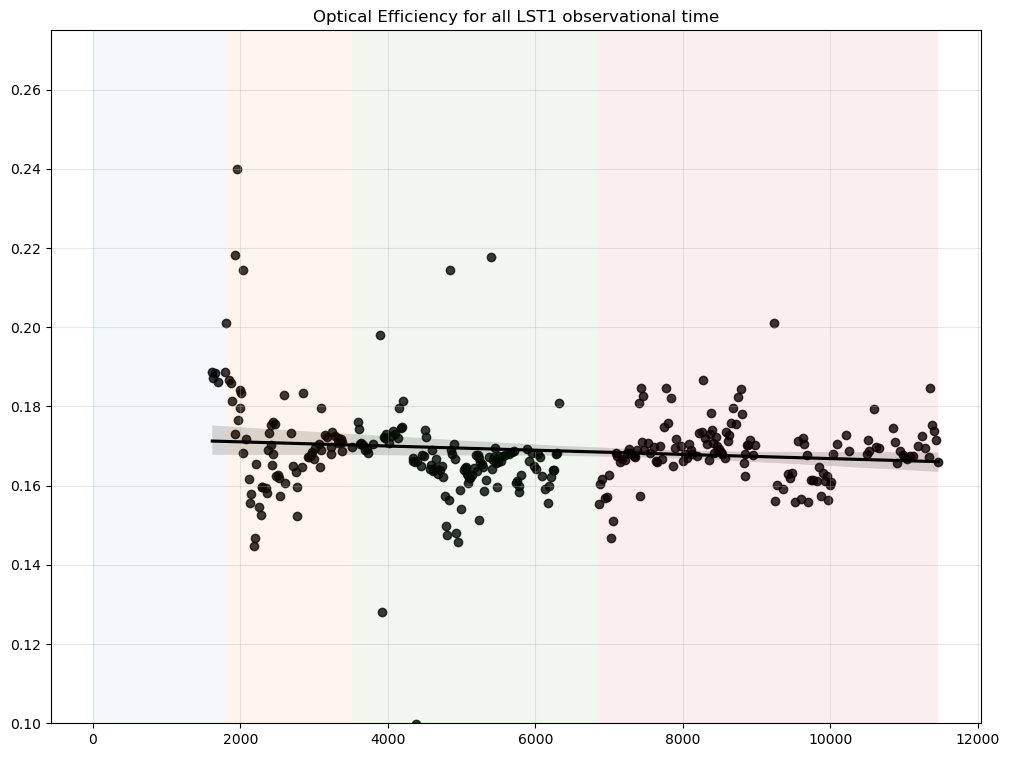

In [19]:
plt.figure(figsize = (12,9))
sns.regplot(x = mean_runs, y = mean_opt_efficiency, color = 'k')#, label = 'Mean Optical Efficiency during one observation')#, x_bins=75
#plt.errorbar(mean_runs, mean_opt_efficiency, yerr=std_opt, fmt = 'none', capsize=5, zorder=1, color='C0', alpha = 0.4)
plt.grid(alpha = 0.3)
plt.title("Optical Efficiency for all LST1 observational time")
#plt.vlines(3000,0,0.3)
plt.ylim(0.1,0.275)
plt.fill_betweenx(y=[0,0.3], x1 = 0, x2=x_fill[1], alpha = 0.05)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[1], x2=x_fill[2], alpha = 0.075)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[2], x2=x_fill[3], alpha = 0.075)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[3], x2=x_fill[4], alpha = 0.075)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[4], x2=x_fill[5], alpha = 0.075)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[5], x2=18000, alpha = 0.075)
plt.xlim(0,18000)
plt.xlabel('Run number')
plt.ylabel('Mean optical efficiency')
plt.legend()

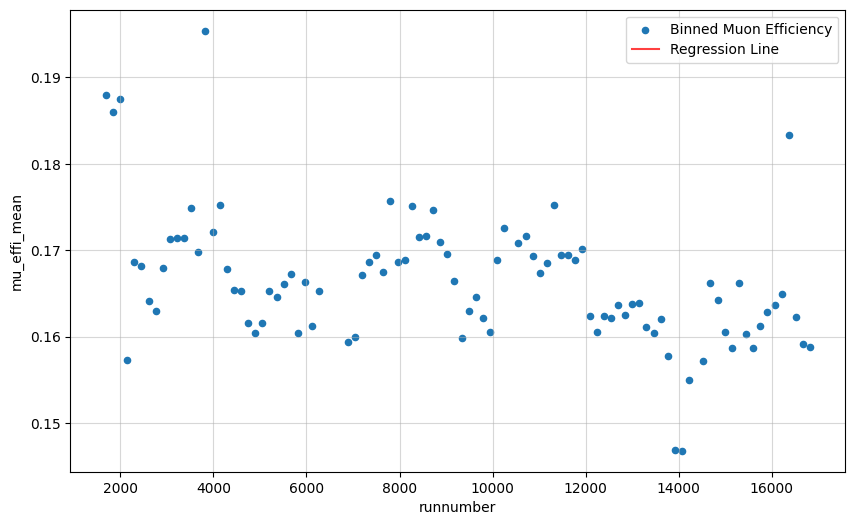

In [12]:
x_value_str = 'runnumber'
y_value_str = 'mu_effi_mean'
df_good_data = cosmics_pd
# Step 1: Create bins for 'ring_radius'
df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=100)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of binned values
plt.scatter(binned_data['bin_mid'], binned_data[y_value_str], label='Binned Muon Efficiency', s=20)

# Calculate and plot the regression line over the original data
m, b = np.polyfit(df_good_data[x_value_str], df_good_data[y_value_str], 1)
plt.plot(df_good_data[x_value_str], m*df_good_data[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)

plt.xlabel(f'{x_value_str}')
plt.ylabel(f'{y_value_str}')
#plt.axhline(y=mean_ring_size, color='g', linestyle='--', label = f'Mean ring_size for this period = {round(mean_ring_size, 3)}')
#plt.axvline(x=mean_ring_radius, color='orange', linestyle='--', label = f'Mean ring radius for this period = {round(mean_ring_radius,3)} pe')
plt.legend()
#plt.ylim(0,1.1)
#plt.xlim(0,0.3)
plt.grid(alpha=0.5)
#plt.show()
#plt.savefig('/home/jovyan/XImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/home/jovyan/OptEffVSImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/Users/vdk/muons2024/images/RadiusVsSize_19-23Y.png', dpi=200, format='png', bbox_inches='tight')

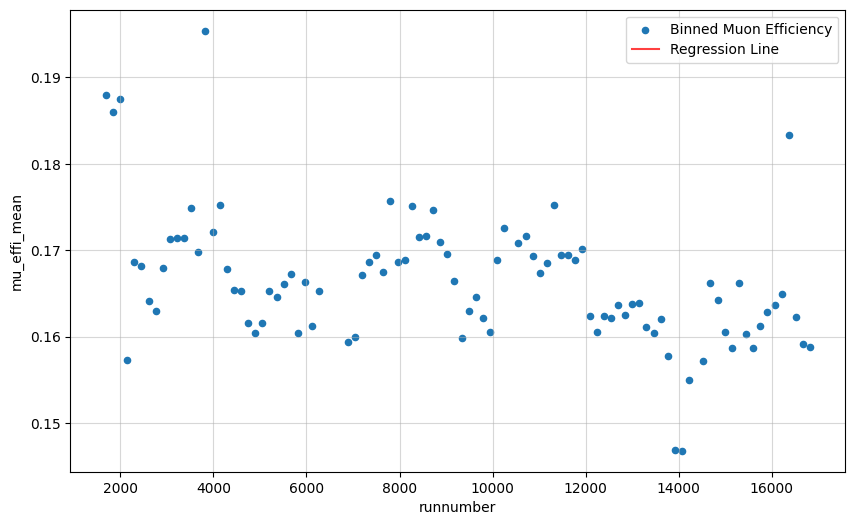

In [15]:
x_value_str = 'runnumber'
y_value_str = 'mu_effi_mean'
df_good_data = cosmics_pd
# Step 1: Create bins for 'ring_radius'
df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=100)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of binned values
plt.scatter(binned_data['bin_mid'], binned_data[y_value_str], label='Binned Muon Efficiency', s=20)

# Calculate and plot the regression line over the original data
m, b = np.polyfit(df_good_data[x_value_str], df_good_data[y_value_str], 1)
plt.plot(df_good_data[x_value_str], m*df_good_data[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)

plt.xlabel(f'{x_value_str}')
plt.ylabel(f'{y_value_str}')
#plt.axhline(y=mean_ring_size, color='g', linestyle='--', label = f'Mean ring_size for this period = {round(mean_ring_size, 3)}')
#plt.axvline(x=mean_ring_radius, color='orange', linestyle='--', label = f'Mean ring radius for this period = {round(mean_ring_radius,3)} pe')
plt.legend()
#plt.ylim(0,2)
#plt.xlim(0,0.3)
plt.grid(alpha=0.5)
#plt.show()
#plt.savefig('/home/jovyan/XImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/home/jovyan/OptEffVSImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/Users/vdk/muons2024/images/RadiusVsSize_19-23Y.png', dpi=200, format='png', bbox_inches='tight')

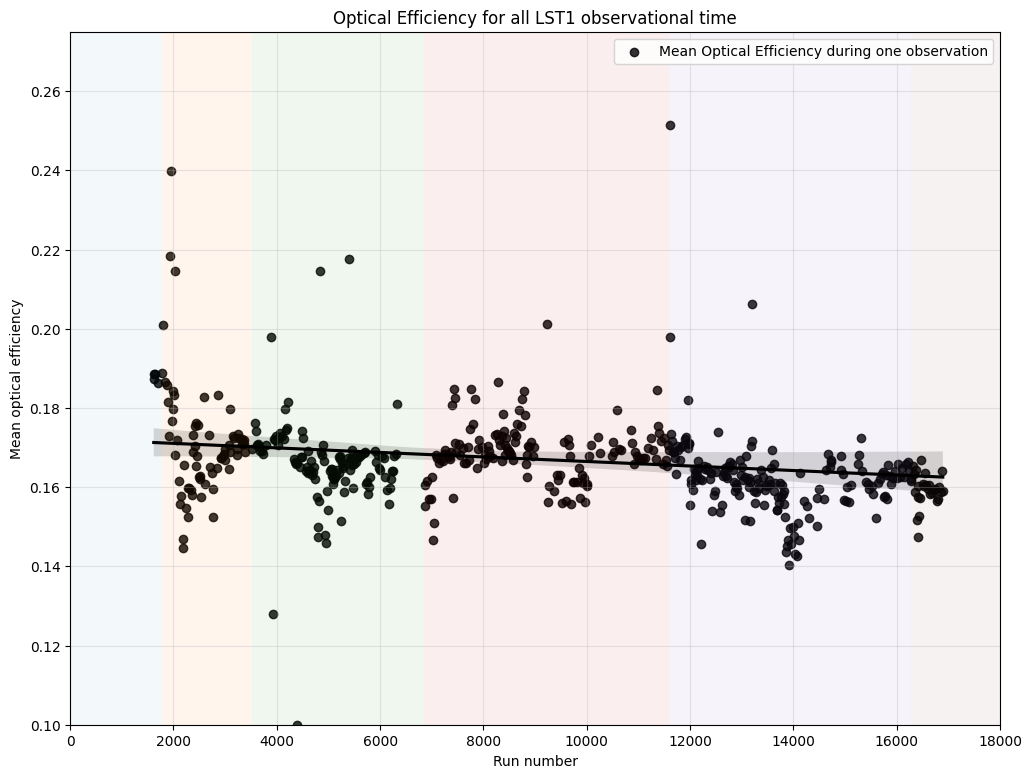

In [20]:
plt.figure(figsize = (12,9))
sns.regplot(x = mean_runs, y = mean_opt_efficiency, color = 'k', label = 'Mean Optical Efficiency during one observation')#, x_bins=75
#plt.errorbar(mean_runs, mean_opt_efficiency, yerr=std_opt, fmt = 'none', capsize=5, zorder=1, color='C0', alpha = 0.4)
plt.grid(alpha = 0.3)
plt.title("Optical Efficiency for all LST1 observational time")
#plt.vlines(3000,0,0.3)
plt.ylim(0.1,0.275)
plt.fill_betweenx(y=[0,0.3], x1 = 0, x2=x_fill[1], alpha = 0.05)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[1], x2=x_fill[2], alpha = 0.075)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[2], x2=x_fill[3], alpha = 0.075)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[3], x2=x_fill[4], alpha = 0.075)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[4], x2=x_fill[5], alpha = 0.075)
plt.fill_betweenx(y=[0,0.3], x1 = x_fill[5], x2=18000, alpha = 0.075)
plt.xlim(0,18000)
plt.xlabel('Run number')
plt.ylabel('Mean optical efficiency')
plt.legend()

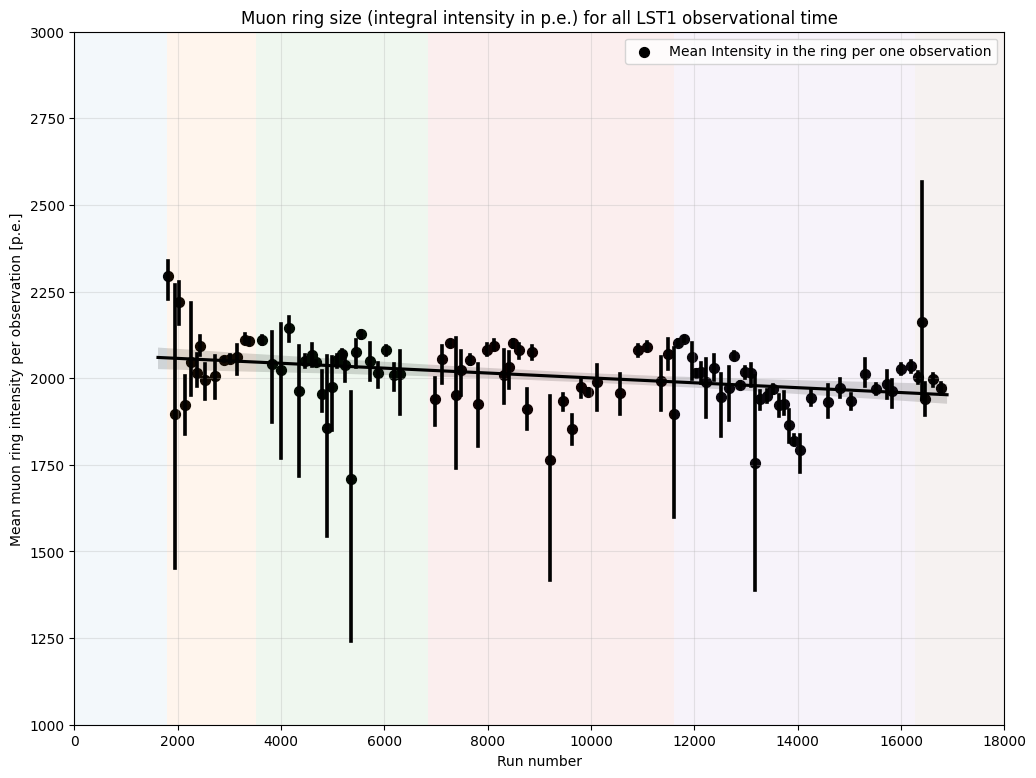

In [120]:
plt.figure(figsize = (12,9))
sns.regplot(x = mean_runs, y = mean_size, color = 'k', label = 'Mean Intensity in the ring per one observation', x_bins=100)
#plt.errorbar(mean_runs, mean_opt_efficiency, yerr=std_opt, fmt = 'none', capsize=5, zorder=1, color='C0', alpha = 0.4)
plt.grid(alpha = 0.3)
plt.title("Muon ring size (integral intensity in p.e.) for all LST1 observational time")


plt.fill_betweenx(y=[0,10000], x1 = 0, x2=x_fill[1], alpha = 0.05)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[1], x2=x_fill[2], alpha = 0.075)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[2], x2=x_fill[3], alpha = 0.075)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[3], x2=x_fill[4], alpha = 0.075)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[4], x2=x_fill[5], alpha = 0.075)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[5], x2=18000, alpha = 0.075)
plt.xlim(0,18000)
plt.ylim(1000,3000)
plt.xlabel('Run number')
plt.ylabel('Mean muon ring intensity per observation [p.e.]')
plt.legend()

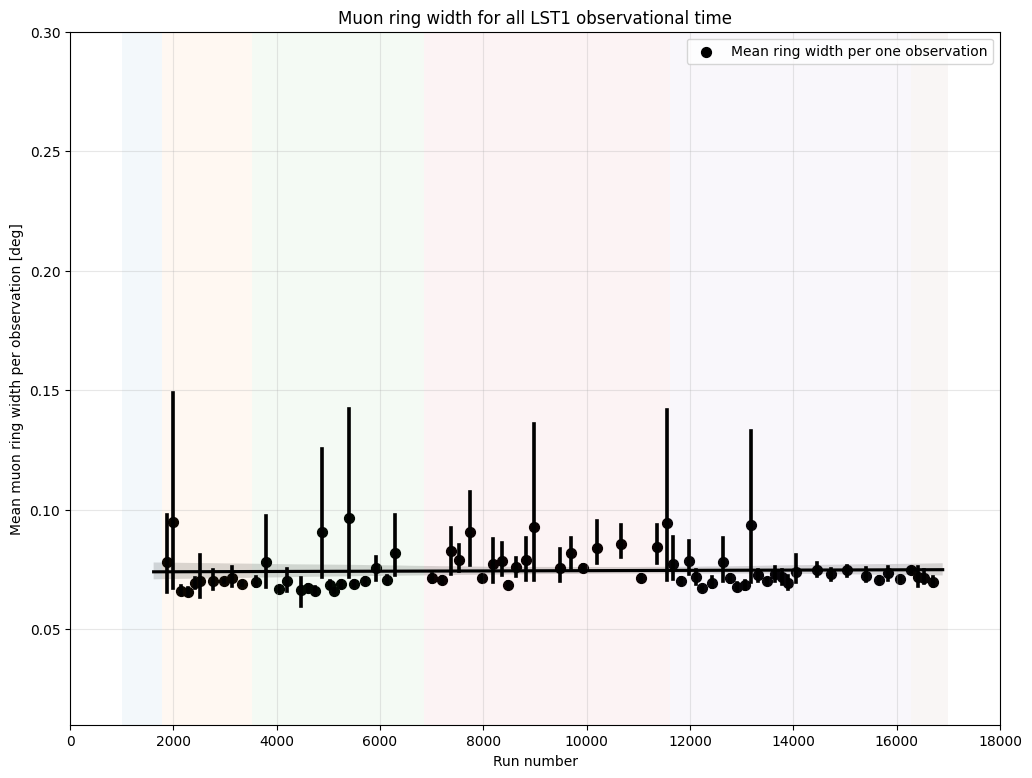

In [114]:
plt.figure(figsize = (12,9))
sns.regplot(x = mean_runs, y = mean_width, color = 'k', label = 'Mean ring width per one observation', x_bins=75)
#plt.errorbar(mean_runs, mean_opt_efficiency, yerr=std_opt, fmt = 'none', capsize=5, zorder=1, color='C0', alpha = 0.4)
plt.grid(alpha = 0.3)
plt.title("Muon ring width for all LST1 observational time")


plt.fill_betweenx(y=[0,10000], x1 = 1000, x2=x_fill[1], alpha = 0.05)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[1], x2=x_fill[2], alpha = 0.05)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[2], x2=x_fill[3], alpha = 0.05)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[3], x2=x_fill[4], alpha = 0.05)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[4], x2=x_fill[5], alpha = 0.05)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[5], x2=17000, alpha = 0.05)
plt.xlim(0,18000)
plt.ylim(0.01,0.3)
plt.xlabel('Run number')
plt.ylabel('Mean muon ring width per observation [deg]')
plt.legend()

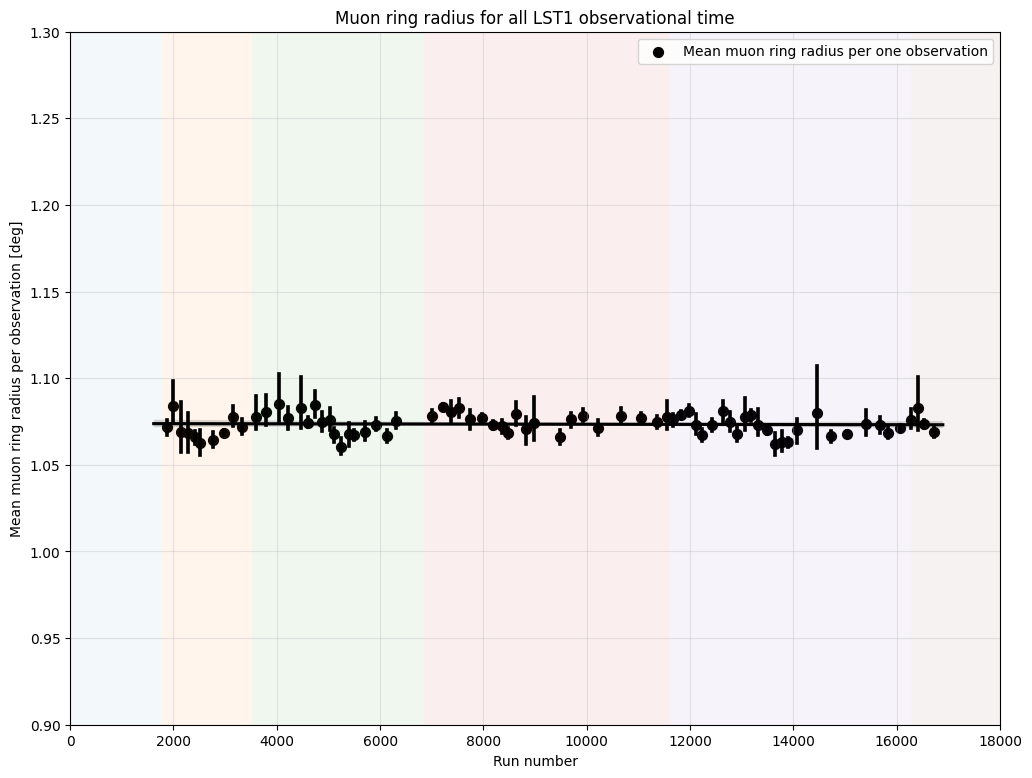

In [113]:
plt.figure(figsize = (12,9))
sns.regplot(x = mean_runs, y = mean_radius, color = 'k', label = 'Mean muon ring radius per one observation', x_bins=75)
#plt.errorbar(mean_runs, mean_opt_efficiency, yerr=std_opt, fmt = 'none', capsize=5, zorder=1, color='C0', alpha = 0.4)
plt.grid(alpha = 0.3)
plt.title("Muon ring radius for all LST1 observational time")


plt.fill_betweenx(y=[0,10000], x1 = 0, x2=x_fill[1], alpha = 0.05)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[1], x2=x_fill[2], alpha = 0.075)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[2], x2=x_fill[3], alpha = 0.075)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[3], x2=x_fill[4], alpha = 0.075)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[4], x2=x_fill[5], alpha = 0.075)
plt.fill_betweenx(y=[0,10000], x1 = x_fill[5], x2=18000, alpha = 0.075)
plt.xlim(0,18000)
plt.ylim(0.9,1.3)
plt.xlabel('Run number')
plt.ylabel('Mean muon ring radius per observation [deg]')
plt.legend()

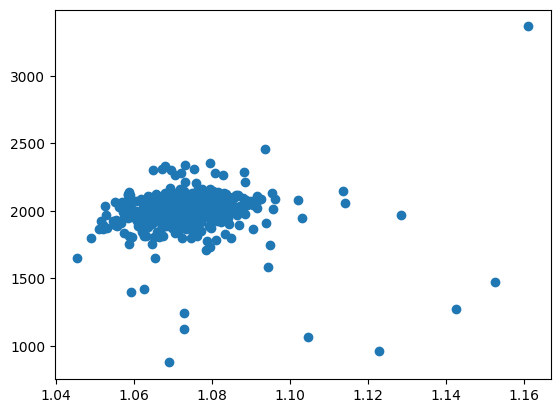

In [54]:
#sns.regplot(x = mean_radius, y = mean_size, color = 'k', label = 'Mean Optical Efficiency during one observation')
plt.scatter(mean_radius,mean_size)

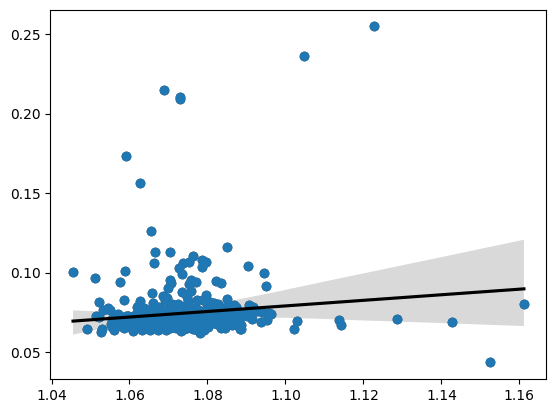

In [55]:
 b

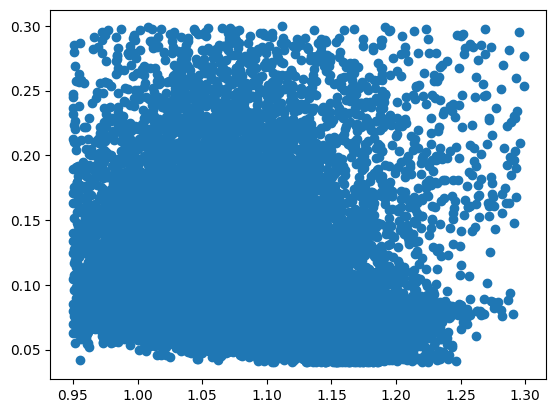

In [100]:
#sns.regplot(x = cosmics_pd['mu_radius_mean'][(cosmics_pd['mu_radius_mean'] > 0.95) & (cosmics_pd['mu_radius_mean'] < 1.3)], y = cosmics_pd['mu_width_mean'][(cosmics_pd['mu_radius_mean'] > 0.95) & (cosmics_pd['mu_radius_mean'] < 1.3)], color = 'k', label = 'Mean Optical Efficiency during one observation')
x = cosmics_pd['mu_radius_mean'][(cosmics_pd['mu_width_mean'] > 0.04) & (cosmics_pd['mu_width_mean'] < 0.3) & (cosmics_pd['mu_radius_mean'] > 0.95) & (cosmics_pd['mu_radius_mean'] < 1.3)]
y = cosmics_pd['mu_width_mean'][(cosmics_pd['mu_width_mean'] > 0.04) & (cosmics_pd['mu_width_mean'] < 0.3) & (cosmics_pd['mu_radius_mean'] > 0.95) & (cosmics_pd['mu_radius_mean'] < 1.3)]
plt.scatter(x, y)

In [96]:
len(cosmics_pd['mu_radius_mean'][(cosmics_pd['mu_radius_mean'] > 0.95) & (cosmics_pd['mu_radius_mean'] < 1.3)])

780461

Text(0, 0.5, 'Mean optical efficiency for observation')

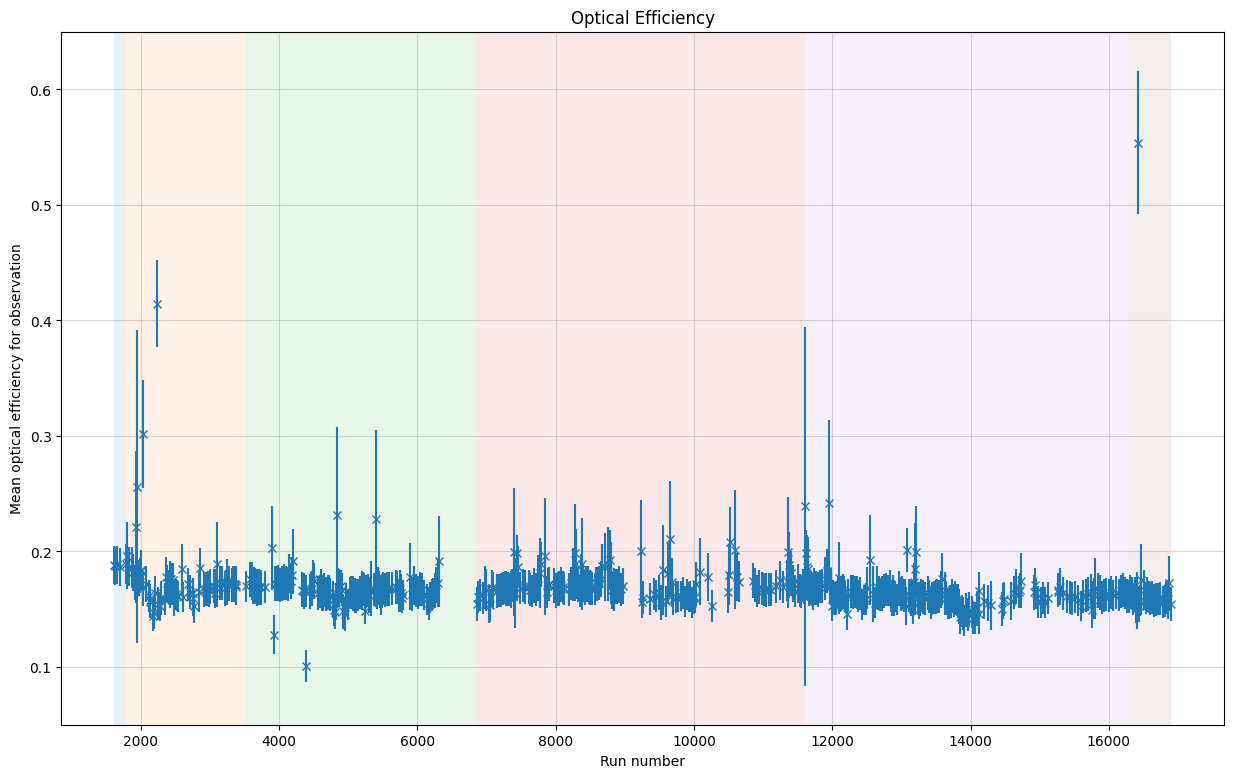

In [202]:
plt.figure(figsize = (15,9))
plt.errorbar(x = mean_runs, y = mean_opt_efficiency, yerr = std_opt, fmt = 'x')#, color = 'k', label = 'Real Data')
plt.grid(alpha = 0.5)
plt.fill_betweenx(y=[0,0.65], x1 = x_fill[0], x2=x_fill[1], alpha = 0.1)
plt.fill_betweenx(y=[0,0.65], x1 = x_fill[1], x2=x_fill[2], alpha = 0.1)
plt.fill_betweenx(y=[0,0.65], x1 = x_fill[2], x2=x_fill[3], alpha = 0.1)
plt.fill_betweenx(y=[0,0.65], x1 = x_fill[3], x2=x_fill[4], alpha = 0.1)
plt.fill_betweenx(y=[0,0.65], x1 = x_fill[4], x2=x_fill[5], alpha = 0.1)
plt.fill_betweenx(y=[0,0.65], x1 = x_fill[5], x2=x_fill[6], alpha = 0.1)
plt.ylim(0.05,0.65)
plt.title("Optical Efficiency")
plt.xlabel('Run number')
plt.ylabel('Mean optical efficiency for observation')

In [221]:
result = sc.stats.linregress(mean_runs,mean_opt_efficiency)
result

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

In [172]:
radius2973 = []
intensity2973 = []

for observ in runsummary:
    for i,run in enumerate(observ['runnumber']):
        if run == 2973:
            print(datetime.utcfromtimestamp(observ['time'][i]).strftime('%Y-%m-%d %H:%M:%S'))


2020-11-21 02:44:10


In [132]:
print(f"2019 year = {dates.count(2019)}")
print(f"2020 year = {dates.count(2020)}")
print(f"2021 year = {dates.count(2021)}")
print(f"2022 year = {dates.count(2022)}")
print(f"2023 year = {dates.count(2023)}")
print(f"2024 year = {dates.count(2024)}")
runs

2019 year = 27
2020 year = 515
2021 year = 1345
2022 year = 2573
2023 year = 2990
2024 year = 501


[2249.0]

runsummary[-1]['runnumber'][0] - runsummary[0]['runnumber'][0]

1574553181.0764747
1574555024.8218086
1574556776.189243
1574558562.7174046
1574560373.4191608
1574561848.1021724
1574564035.4352517
1574565736.1409497
1574637918.7137816
1574639685.7615247
1574641259.1099496
1574643034.112661
1574644746.014012
1574646029.5975409
1574646754.1256983
1574647543.488522
1574813283.9766808
1574814314.779716
1574814495.4360566
1574815435.4036057
1574816729.929427
1574817964.5444422
1574819067.1071777
1575062454.98281
1575071115.0924575
1575071825.8401794
1575072602.8407109
1579037253.815923
1579039507.1517727
1579122558.4243984
1579123157.0769584
1579124375.072189
1579125974.1485534
1579127643.9586985
1579129261.346785
1579130593.9462037
1579135674.6023219
1579139752.8822083
1579141214.454286
1579292600.1176746
1579293238.7073042
1579293790.3259125
1579295644.2020178
1579296081.9362268
1579298160.937846
1579299298.8875904
1579300541.6356165
1579301720.9943128
1579302917.5914645
1579304251.4093385
1579305646.9715343
1579306659.7812786
1579307891.6988213
157930

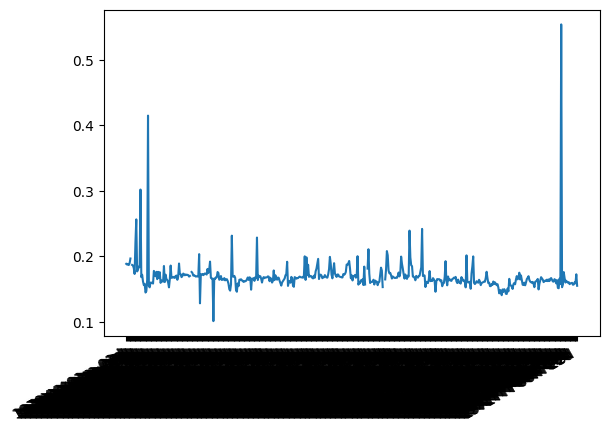

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(observation_date, mean_opt_efficiency)

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%YYYY-%mm-%dd'))

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

,runnumber,subrun,time,elapsed_time,events,azimuth,altitude,wrong_ucts_trig_type,wrong_tib_trig_type,unknown_ucts_trig_type,...,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_radius_mean,mu_radius_stddev,mu_intensity_mean,mu_hg_peak_sample,mu_hg_peak_sample_stddev,fraction_pulses_above10,fraction_pulses_above30
0,1615,0,1.574552e+09,24.100643,50637,4.604371,1.071770,0.0,10.0,50637,...,0.010725,0.062351,0.017688,1.070335,0.099711,2313.711426,12.662162,1.037344,0.010618,0.002622
1,1615,1,1.574552e+09,24.087356,50634,4.607692,1.067383,0.0,8.0,50634,...,0.013619,0.066789,0.017587,1.046328,0.108055,2315.158691,13.393939,1.507711,0.010700,0.002738
2,1615,2,1.574552e+09,24.476276,50605,4.608190,1.066719,0.0,10.0,50605,...,0.015461,0.064313,0.020475,1.083877,0.105996,2343.243164,12.847222,1.285452,0.010981,0.002713
3,1615,3,1.574553e+09,24.035344,50645,4.609890,1.064421,0.0,10.0,50645,...,0.013594,0.064370,0.026010,1.050182,0.115174,2297.864502,13.094595,1.346420,0.010611,0.002712
4,1615,4,1.574553e+09,25.515290,50630,4.610365,1.063804,0.0,9.0,50630,...,0.013783,0.062570,0.015944,1.088282,0.101900,2372.299072,12.847222,1.589222,0.010605,0.002699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790755,16897,4,1.709166e+09,119.236720,36080,1.248052,0.800884,0.0,0.0,0,...,0.009036,0.126604,0.015442,1.146832,0.102177,1323.607422,11.375000,1.500000,0.030590,0.004015
790756,16897,5,1.709166e+09,150.845175,29721,1.249751,0.808214,0.0,0.0,0,...,0.011334,0.122119,0.021165,1.087885,0.053706,1298.256470,10.666667,1.775251,0.037174,0.004128
790757,16897,6,1.709167e+09,176.522166,24594,1.252201,0.818946,0.0,0.0,0,...,NaN,0.111994,NaN,1.200372,NaN,1388.520020,4.000000,NaN,0.042609,0.005328
790758,16897,7,1.709167e+09,177.568846,24384,1.254610,0.829748,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025073,0.005885


<Axes: xlabel='runnumber', ylabel='num_contained_mu_rings'>

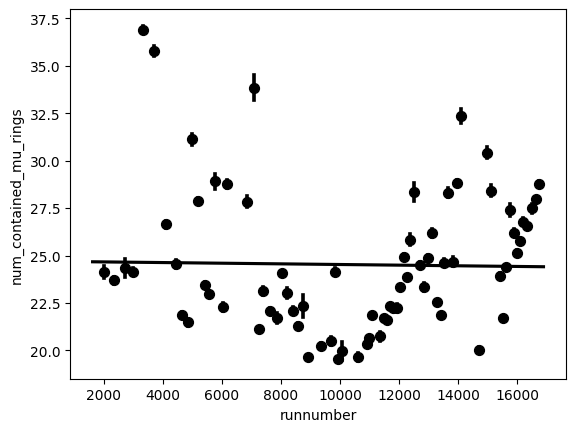

In [127]:
sns.regplot(x = cosmics_pd['runnumber'], y = cosmics_pd['num_contained_mu_rings'], color = 'k', label = 'Mean muon ring radius per one observation', x_bins=75)

In [136]:
cosmics_pd['runnumber']

0          1615
1          1615
2          1615
3          1615
4          1615
          ...  
790755    16897
790756    16897
790757    16897
790758    16897
790759    16897
Name: runnumber, Length: 790760, dtype: int64

In [128]:
runsummary_pd.columns

Index(['runnumber', 'time', 'elapsed_time', 'min_altitude', 'mean_altitude',
       'max_altitude', 'min_azimuth', 'max_azimuth', 'mean_azimuth', 'mean_ra',
       'mean_dec', 'num_cosmics', 'num_pedestals', 'num_flatfield',
       'num_unknown_ucts_trigger_tags', 'num_wrong_ucts_tags_in_cosmics',
       'num_wrong_ucts_tags_in_pedestals', 'num_wrong_ucts_tags_in_flatfield',
       'num_ucts_jumps', 'num_unknown_tib_trigger_tags',
       'num_wrong_tib_tags_in_cosmics', 'num_wrong_tib_tags_in_pedestals',
       'num_wrong_tib_tags_in_flatfield', 'num_pedestals_after_cleaning',
       'num_contained_mu_rings', 'ff_charge_mean', 'ff_charge_mean_err',
       'ff_charge_stddev', 'ff_time_mean', 'ff_time_mean_err',
       'ff_time_stddev', 'ff_rel_time_stddev', 'ped_charge_mean',
       'ped_charge_mean_err', 'ped_charge_stddev',
       'ped_fraction_pulses_above10', 'ped_fraction_pulses_above30',
       'cosmics_fraction_pulses_above10', 'cosmics_fraction_pulses_above30',
       'mu_effi_m

In [139]:
max(runsummary_pd['ff_time_mean'])

32.457792447701244

In [26]:
pd.read_hdf(file)

ValueError: key must be provided when HDF5 file contains multiple datasets.

In [28]:
with pd.HDFStore(file) as hdf:
    # This prints a list of all group names:
    print(hdf.keys())


['/cosmics', '/cosmics_intensity_spectrum', '/flatfield', '/pedestals', '/runsummary']


In [32]:
cis.columns

Index(['yyyymmdd', 'ra_tel', 'dec_tel', 'cos_zenith', 'az_tel', 'runnumber',
       'subrun', 'time', 'elapsed_time', 'corrected_elapsed_time',
       'delta_t_exp_index', 'cosmics_rate', 'cosmics_cleaned_rate',
       'intensity_at_half_peak_rate', 'intensity_at_peak_rate',
       'ZD_corrected_intensity_at_half_peak_rate', 'cosmics_peak_rate',
       'ZD_corrected_cosmics_peak_rate', 'cosmics_rate_at_422_pe',
       'delta_cosmics_rate_at_422_pe', 'ZD_corrected_cosmics_rate_at_422_pe',
       'ZD_corrected_delta_cosmics_rate_at_422_pe', 'cosmics_spectral_index',
       'delta_cosmics_spectral_index', 'ZD_corrected_cosmics_spectral_index',
       'intensity_spectrum_fit_p_value', 'intensity_at_reference_rate',
       'light_yield', 'diffuse_nsb_std', 'num_star_affected_pixels',
       'anomalous_low_intensity_peak'],
      dtype='object')

In [36]:
min(cis['diffuse_nsb_std'])

1.6790622472763062